# 🚀 Enhanced LLM Reasoning Comparison with Advanced Models & Visualizations

## 🎯 What's New in This Enhanced Version:

### 🤖 **Expanded Model Coverage**
- **12+ Advanced Models** including DeepSeek, Qwen, GPT-Neo, TinyLlama
- **Multiple Categories**: Small/Fast, Medium, Large, Specialized, Open Source
- **Performance-Optimized**: Models prioritized by expected performance
- **Resource-Aware**: Clear indicators for GPU/memory requirements

### 📊 **Comprehensive Visualizations**
- **Performance Bar Charts**: Quality and speed comparison
- **Radar Charts**: Multi-dimensional quality analysis
- **Speed vs Quality Scatter**: Find optimal balance points
- **Size vs Performance**: Parameter efficiency analysis
- **Category Heatmaps**: Detailed breakdown by fraud indicators
- **Interactive Dashboard**: Plotly-powered exploration

### 🔬 **Advanced Quality Assessment**
- **8 Quality Categories** with 97+ individual indicators
- **Real Dataset Integration** using your CSV fraud data
- **Fraud-Type Specific Scoring** for relevance assessment
- **Coherence & Relevance Metrics** for explanation quality

### 💡 **Smart Recommendations**
- **Use-Case Specific**: Production, Research, Speed-Critical, Quality-First
- **Resource Considerations**: GPU memory and parameter requirements
- **Open Source Options**: For budget-conscious or research use
- **Deployment Guidance**: Integration recommendations

---


In [1]:
# Install required packages for local reasoning
!pip install transformers torch accelerate --quiet

# Import libraries
import pandas as pd
import numpy as np
import torch
import warnings
import json
import os
from pathlib import Path
import time
from datetime import datetime

warnings.filterwarnings('ignore')

print("🚀 Fraud Detection Reasoning Environment Setup")
print("=" * 50)
print(f"✅ GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🎮 GPU: {torch.cuda.get_device_name(0)}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("⚠️  Using CPU - consider enabling GPU accelerator")

print("✅ Environment ready for local reasoning!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00:00:0100:01
🚀 Fraud Detection Reasoning Environment Setup
✅ GPU Available: True
🎮 GPU: Tesla T4
💾 GPU Memory: 15.8 GB

# 🧠 Local Fraud Detection Reasoning on Kaggle

This notebook provides **local AI-powered reasoning** for fraud detection using Kaggle's GPU resources instead of paid APIs.

## 🚀 SETUP INSTRUCTIONS FOR KAGGLE

### Step 1: Upload Your Trained Model
1. **Create a Kaggle Dataset** with your trained model files:
   - Upload your `distilbert_model/` folder (contains config.json, model.safetensors)
   - Upload your `distilbert_tokenizer/` folder (contains tokenizer files)
   - Name your dataset (e.g., "fraud-detection-models")

### Step 2: Add Dataset to This Notebook
1. **Add your dataset as input** to this notebook:
   - Click "Add data" → "Your datasets" → Select your model dataset
   - This makes your model files available at `/kaggle/input/your-dataset-name/`

### Step 3: Update Model Paths
1. **Update the paths in Cell 4** to match your dataset name:
   ```python
   MODEL_PATH = '/kaggle/input/YOUR-DATASET-NAME/distilbert_model'
   TOKENIZER_PATH = '/kaggle/input/YOUR-DATASET-NAME/distilbert_tokenizer'
   ```

### Step 4: Run the Notebook
1. **Enable GPU accelerator** for faster inference
2. **Run all cells** to load your model and start analyzing texts

## 📊 Pipeline Flow
1. **Load** your trained DistilBERT model from Kaggle dataset
2. **Classify** texts into fraud categories using your actual model  
3. **Generate reasoning** using local LM for non-legitimate classifications
4. **Download** results with explanations

## 🔧 Requirements
- Your trained `distilbert_model/` and `distilbert_tokenizer/` uploaded as a Kaggle dataset
- GPU accelerator enabled for faster inference
- No API keys needed - everything runs locally!

## ⚠️ Important Notes
- **Without proper model upload**: Notebook will run in demo mode with simulated results
- **With proper model upload**: You get real AI-powered fraud detection and reasoning
- The reasoning engine works with ANY classification result (real or demo)

In [2]:
# Load Local Language Model for Reasoning (Free Alternative to APIs)
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

print("🧠 Loading Local Language Model for Reasoning...")

# Use a smaller, efficient model that works well on Kaggle's free tier
# Options: 'microsoft/DialoGPT-medium', 'gpt2', 'distilgpt2'
reasoning_model_name = "microsoft/DialoGPT-medium"  # Good balance of quality and speed

try:
    # Initialize reasoning pipeline
    reasoning_pipe = pipeline(
        "text-generation",
        model=reasoning_model_name,
        device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
        do_sample=True,
        temperature=0.7,
        max_length=512,
        pad_token_id=50256  # Set pad token to avoid warnings
    )
    
    print(f"✅ Local reasoning model loaded: {reasoning_model_name}")
    print("💡 This model will generate explanations locally (no API costs!)")
    
    # Test the reasoning model
    test_prompt = "This text appears to be a scam because"
    test_response = reasoning_pipe(test_prompt, max_length=50, num_return_sequences=1)
    print("🧪 Model test successful!")
    
except Exception as e:
    print(f"⚠️  Error loading model: {e}")
    print("Falling back to simpler model...")
    # Fallback to smaller model
    reasoning_pipe = pipeline("text-generation", model="distilgpt2", device=0 if torch.cuda.is_available() else -1)

2025-09-17 12:44:57.069060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758113097.276973      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758113097.335010      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🧠 Loading Local Language Model for Reasoning...


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Local reasoning model loaded: microsoft/DialoGPT-medium
💡 This model will generate explanations locally (no API costs!)
🧪 Model test successful!


# 🧪 Advanced LLM Testing Framework - Compare Multiple Models + Visualizations

This section tests different language models to find the best one for fraud detection reasoning with **comprehensive visualizations**. We'll evaluate:
- **Quality**: How well does the model explain fraud patterns? (8 categories, 97+ indicators)
- **Speed**: How fast is inference?
- **Memory**: How much GPU/CPU memory does it use?
- **Coherence**: How readable and logical are the explanations?
- **Relevance**: How relevant are explanations to specific fraud types?

## 🚀 Advanced Models to Test:

### Small/Fast Models (High Priority)
- **distilgpt2** - 82M params (fastest, smallest)
- **microsoft/DialoGPT-small** - 117M params (conversational)

### Medium Models (Balanced Performance)
- **gpt2** - 124M params (standard, often best balance)
- **microsoft/DialoGPT-medium** - 345M params (good explanations)
- **gpt2-medium** - 355M params (detailed reasoning)

### Advanced Open Source Models
- **EleutherAI/gpt-neo-125m** - 125M params (EleutherAI OSS)
- **microsoft/DialoGPT-large** - 762M params (high quality dialogue)

### Cutting-edge Specialized Models
- **deepseek-ai/deepseek-coder-1.3b-base** - 1.3B params (advanced reasoning)
- **Qwen/Qwen1.5-0.5B** - 0.5B params (Alibaba Cloud OSS)
- **TinyLlama/TinyLlama-1.1B-Chat-v1.0** - 1.1B params (optimized chat)

### Production-Ready MoE Models
- **microsoft/gpt-oss-20b** - 21B total params with 3.6B active (optimal latency)

### Large Models (Resource Intensive)
- **EleutherAI/gpt-j-6b** - 6B params (requires 16GB+ GPU)

## 📊 Comprehensive Visualizations Included:
1. **Performance Bar Charts** - Overall quality and speed comparison
2. **Radar Charts** - Quality categories breakdown for top models
3. **Speed vs Quality Scatter Plot** - Find optimal balance models
4. **Model Size vs Performance** - Understand parameter efficiency
5. **Category Performance Heatmap** - Detailed quality analysis
6. **Interactive Dashboard** - Plotly-powered exploration

Each model will be tested on **real fraud examples** from your CSV dataset with detailed quality analysis.

In [3]:
# Enhanced Multi-Model Testing Framework for Fraud Reasoning
import time
import gc
import traceback
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import Dict, List, Tuple
from collections import Counter

# Install additional visualization packages
!pip install plotly matplotlib seaborn --quiet

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

class EnhancedLLMTester:
    """Test multiple language models for fraud detection reasoning with comprehensive quality metrics and advanced visualizations"""
    
    def __init__(self):
        self.models_to_test = [
            # Small/Fast Models (High Priority)
            {
                'name': 'distilgpt2',
                'type': 'causal',
                'size': 'small',
                'category': 'small',
                'description': 'Distilled GPT-2 (fastest, smallest)',
                'params': '82M',
                'priority': 'high',
                'expected_performance': 'fast_inference'
            },
            {
                'name': 'microsoft/DialoGPT-small',
                'type': 'conversational',
                'size': 'small',
                'category': 'small',
                'description': 'Small conversational model',
                'params': '117M',
                'priority': 'medium',
                'expected_performance': 'good_dialogue'
            },
            # Medium Models (Balanced)
            {
                'name': 'gpt2',
                'type': 'causal',
                'size': 'medium',
                'category': 'medium',
                'description': 'Standard GPT-2 model',
                'params': '124M',
                'priority': 'high',
                'expected_performance': 'best_balance'
            },
            {
                'name': 'microsoft/DialoGPT-medium',
                'type': 'conversational',
                'size': 'medium',
                'category': 'medium',
                'description': 'Medium conversational AI',
                'params': '345M',
                'priority': 'high',
                'expected_performance': 'good_explanations'
            },
            {
                'name': 'gpt2-medium',
                'type': 'causal',
                'size': 'medium',
                'category': 'medium',
                'description': 'GPT-2 Medium (355M)',
                'params': '355M',
                'priority': 'medium',
                'expected_performance': 'detailed_reasoning'
            },
            # Advanced Open Source Models
            {
                'name': 'EleutherAI/gpt-neo-125m',
                'type': 'causal',
                'size': 'small-medium',
                'category': 'neo',
                'description': 'GPT-Neo 125M (EleutherAI OSS)',
                'params': '125M',
                'priority': 'high',
                'expected_performance': 'open_source_quality'
            },
            {
                'name': 'microsoft/DialoGPT-large',
                'type': 'conversational',
                'size': 'large',
                'category': 'large',
                'description': 'Large conversational model',
                'params': '762M',
                'priority': 'medium',
                'expected_performance': 'high_quality_dialogue'
            },
            # Cutting-edge Specialized Models
            {
                'name': 'deepseek-ai/deepseek-coder-1.3b-base',
                'type': 'coding',
                'size': 'medium-large',
                'category': 'specialized',
                'description': 'DeepSeek Coder 1.3B (advanced reasoning)',
                'params': '1.3B',
                'priority': 'high',
                'expected_performance': 'superior_reasoning'
            },
            {
                'name': 'Qwen/Qwen1.5-0.5B',
                'type': 'causal',
                'size': 'small-medium',
                'category': 'qwen',
                'description': 'Qwen 0.5B (Alibaba Cloud OSS)',
                'params': '0.5B',
                'priority': 'medium',
                'expected_performance': 'efficient_multilingual'
            },
            # Alternative Open Source Models
            {
                'name': 'TinyLlama/TinyLlama-1.1B-Chat-v1.0',
                'type': 'chat',
                'size': 'medium',
                'category': 'tiny',
                'description': 'TinyLlama 1.1B Chat (Optimized OSS)',
                'params': '1.1B',
                'priority': 'medium',
                'expected_performance': 'chat_optimized'
            }
            # # Large Models (Resource Intensive)
            # {
            #     'name': 'EleutherAI/gpt-j-6b',
            #     'type': 'causal',
            #     'size': 'very-large',
            #     'category': 'large',
            #     'description': 'GPT-J 6B (requires 16GB+ GPU)',
            #     'params': '6B',
            #     'priority': 'low',
            #     'expected_performance': 'highest_quality'
            # },
            # {
            #     'name': 'microsoft/DialoGPT-large',
            #     'type': 'conversational',
            #     'size': 'large',
            #     'category': 'large',
            #     'description': 'Large conversational model',
            #     'params': '762M',
            #     'priority': 'low',
            #     'expected_performance': 'detailed_conversations'
            # },
            # # Production-Ready MoE Models
            # {
            #     'name': 'microsoft/gpt-oss-20b',
            #     'type': 'mixture-of-experts',
            #     'size': 'extra-large',
            #     'category': 'production',
            #     'description': 'GPT-OSS 20B MoE - 21B total params with 3.6B active for lower latency',
            #     'params': '21B (3.6B active)',
            #     'priority': 'high',
            #     'expected_performance': 'production_ready_excellence',
            #     'use_case': 'Ideal for production deployment - excellent quality with optimized latency'
            # }
        ]
        
        # Load real test cases from CSV dataset
        self.test_cases = []
        self.load_real_test_cases()
        
        # Comprehensive quality indicators for fraud reasoning
        self.quality_indicators = {
            'fraud_keywords': [
                'scam', 'fraud', 'fraudulent', 'suspicious', 'fake', 'phishing', 'deceptive', 
                'malicious', 'illegitimate', 'unauthorized', 'impersonation', 'steal', 'theft',
                'criminal', 'illegal', 'dangerous', 'harmful', 'misleading', 'dishonest'
            ],
            'urgency_indicators': [
                'urgent', 'immediate', 'emergency', 'critical', 'expires', 'deadline',
                'limited time', 'act now', 'hurry', 'quickly', 'asap', 'time sensitive'
            ],
            'financial_indicators': [
                'money', 'payment', 'prize', 'reward', 'fee', 'cost', 'charge', 'refund',
                'billing', 'account', 'bank', 'credit', 'deposit', 'transfer', 'claim'
            ],
            'action_indicators': [
                'click', 'call', 'contact', 'verify', 'confirm', 'update', 'download',
                'install', 'visit', 'respond', 'reply', 'submit', 'provide', 'send'
            ],
            'technical_indicators': [
                'virus', 'malware', 'infected', 'security', 'breach', 'hacked', 'compromised',
                'system', 'computer', 'device', 'software', 'update', 'patch', 'support'
            ],
            'social_engineering': [
                'trust', 'authority', 'official', 'government', 'legitimate', 'verify',
                'confirm', 'identity', 'personal', 'confidential', 'private', 'secure'
            ],
            'emotional_manipulation': [
                'fear', 'panic', 'worry', 'concern', 'anxiety', 'stress', 'relief',
                'excitement', 'congratulations', 'winner', 'lucky', 'selected', 'special'
            ],
            'explanation_quality': [
                'because', 'since', 'due to', 'reason', 'explains', 'indicates', 'suggests',
                'shows', 'demonstrates', 'reveals', 'exposes', 'highlights', 'pattern'
            ]
        }
        
        self.results = {}
    
    def load_real_test_cases(self):
        """Load test cases from the actual CSV dataset"""
        print("📄 Loading real test cases from CSV dataset...")
        
        try:
            # Try to load a sample of the dataset
            import pandas as pd
            
            # Load dataset (adjust path as needed)
            csv_path = '/kaggle/input/fraud-dataset/final_fraud_detection_dataset.csv'
            if not os.path.exists(csv_path):
                csv_path = '/kaggle/input/fraud-detection-dataset/final_fraud_detection_dataset.csv'
            
            if os.path.exists(csv_path):
                # Load a sample of each fraud type for testing
                print(f"✅ Found dataset at: {csv_path}")
                
                # Read dataset in chunks to handle large files
                chunk_size = 1000
                sample_cases = []
                
                for chunk in pd.read_csv(csv_path, chunksize=chunk_size):
                    # Get samples from each category
                    for category in chunk['detailed_category'].unique():
                        category_samples = chunk[chunk['detailed_category'] == category].head(2)
                        for _, row in category_samples.iterrows():
                            if len(sample_cases) < 20:  # Limit to 20 test cases
                                sample_cases.append({
                                    'type': row['detailed_category'],
                                    'text': row['text'][:500],  # Limit text length
                                    'true_label': row['detailed_category']
                                })
                    
                    if len(sample_cases) >= 20:
                        break
                
                self.test_cases = sample_cases
                print(f"✅ Loaded {len(self.test_cases)} real test cases from dataset")
                
                # Show categories loaded
                categories = Counter([case['type'] for case in self.test_cases])
                print("📊 Test cases by category:")
                for category, count in categories.items():
                    print(f"   {category}: {count} cases")
                
            else:
                print("⚠️  CSV dataset not found, using fallback test cases")
                self.load_fallback_test_cases()
                
        except Exception as e:
            print(f"❌ Error loading CSV dataset: {e}")
            print("🔄 Using fallback test cases instead")
            self.load_fallback_test_cases()
    
    def load_fallback_test_cases(self):
        """Load fallback test cases if CSV is not available"""
        self.test_cases = [
            {
                'type': 'phishing',
                'text': "URGENT: Your PayPal account suspended. Click here to verify: http://paypal-fake.com",
                'true_label': 'phishing'
            },
            {
                'type': 'tech_support_scam',
                'text': "WARNING: Virus detected! Call Microsoft Support: 1-800-FAKE",
                'true_label': 'tech_support_scam'
            },
            {
                'type': 'reward_scam', 
                'text': "Congratulations! You won $1000! Send $50 fee to claim prize!",
                'true_label': 'reward_scam'
            },
            {
                'type': 'legitimate',
                'text': "Your package has been delivered and is waiting at your front door.",
                'true_label': 'legitimate'
            }
        ]
        
    def load_model(self, model_info: Dict) -> Tuple[bool, object, str]:
        """Load a specific model and return success status, pipeline, and error message"""
        try:
            print(f"🔄 Loading {model_info['name']}...")
            start_time = time.time()
            
            # Clear GPU memory first
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()
            
            pipeline_obj = pipeline(
                "text-generation",
                model=model_info['name'],
                device=0 if torch.cuda.is_available() else -1,
                do_sample=True,
                temperature=0.7,
                max_length=256,
                pad_token_id=50256,
                return_full_text=False  # Only return generated text
            )
            
            load_time = time.time() - start_time
            print(f"✅ Loaded {model_info['name']} in {load_time:.2f}s")
            
            return True, pipeline_obj, f"Loaded successfully in {load_time:.2f}s"
            
        except Exception as e:
            error_msg = f"Failed to load: {str(e)}"
            print(f"❌ {model_info['name']}: {error_msg}")
            return False, None, error_msg
    
    def calculate_comprehensive_quality_score(self, generated_text: str, test_case: Dict) -> Dict:
        """Calculate comprehensive quality score using multiple indicators"""
        text_lower = generated_text.lower()
        scores = {}
        total_indicators = 0
        found_indicators = 0
        
        # Calculate score for each indicator category
        for category, indicators in self.quality_indicators.items():
            category_found = sum(1 for indicator in indicators if indicator in text_lower)
            category_total = len(indicators)
            category_score = (category_found / category_total) * 100 if category_total > 0 else 0
            
            scores[f'{category}_score'] = category_score
            scores[f'{category}_found'] = category_found
            scores[f'{category}_total'] = category_total
            
            total_indicators += category_total
            found_indicators += category_found
        
        # Overall quality metrics
        scores['overall_quality'] = (found_indicators / total_indicators) * 100 if total_indicators > 0 else 0
        scores['total_indicators_found'] = found_indicators
        scores['total_indicators_available'] = total_indicators
        
        # Additional quality metrics
        scores['text_length'] = len(generated_text)
        scores['word_count'] = len(generated_text.split())
        scores['coherence_score'] = self.calculate_coherence_score(generated_text)
        scores['relevance_score'] = self.calculate_relevance_score(generated_text, test_case)
        
        return scores
    
    def calculate_coherence_score(self, text: str) -> float:
        """Calculate text coherence based on sentence structure and flow"""
        if not text or len(text.strip()) == 0:
            return 0.0
            
        # Simple coherence metrics
        sentences = text.split('.')
        coherence_indicators = [
            'because', 'since', 'due to', 'therefore', 'thus', 'consequently',
            'however', 'moreover', 'furthermore', 'additionally', 'also'
        ]
        
        coherence_count = sum(1 for indicator in coherence_indicators if indicator in text.lower())
        sentence_count = len([s for s in sentences if len(s.strip()) > 3])
        
        # Score based on logical connectors and sentence structure
        if sentence_count == 0:
            return 0.0
            
        coherence_score = min(100, (coherence_count / sentence_count) * 100 + 20)  # Base score of 20
        return coherence_score
    
    def calculate_relevance_score(self, generated_text: str, test_case: Dict) -> float:
        """Calculate how relevant the reasoning is to the specific fraud type"""
        fraud_type = test_case['type']
        text_lower = generated_text.lower()
        
        # Type-specific keywords
        type_keywords = {
            'phishing': ['phishing', 'credential', 'login', 'password', 'account', 'verify', 'click'],
            'tech_support_scam': ['tech support', 'virus', 'computer', 'microsoft', 'infected', 'call'],
            'reward_scam': ['prize', 'winner', 'reward', 'lottery', 'claim', 'congratulations'],
            'job_scam': ['job', 'work', 'employment', 'income', 'opportunity', 'hiring'],
            'sms_spam': ['text', 'sms', 'message', 'reply', 'stop', 'unsubscribe'],
            'popup_scam': ['popup', 'alert', 'warning', 'browser', 'virus detected'],
            'refund_scam': ['refund', 'billing', 'payment', 'charge', 'bank', 'transaction'],
            'ssn_scam': ['social security', 'ssn', 'government', 'identity', 'verify'],
            'legitimate': ['normal', 'safe', 'legitimate', 'genuine', 'real']
        }
        
        relevant_keywords = type_keywords.get(fraud_type, [])
        if not relevant_keywords:
            return 50.0  # Default score for unknown types
            
        found_keywords = sum(1 for keyword in relevant_keywords if keyword in text_lower)
        relevance_score = (found_keywords / len(relevant_keywords)) * 100
        
        return relevance_score
    
    def test_model_reasoning(self, pipeline_obj, model_name: str, test_case: Dict) -> Dict:
        """Test a model's reasoning capability with comprehensive quality assessment"""
        try:
            start_time = time.time()
            
            # Skip reasoning for legitimate cases (focus on fraud detection)
            if test_case['type'] == 'legitimate':
                return {
                    'success': True,
                    'generated_text': "This text appears to be legitimate communication.",
                    'inference_time': 0.01,
                    'quality_scores': {'overall_quality': 100, 'relevance_score': 100},
                    'prompt_used': 'N/A (legitimate text)',
                    'error': None,
                    'skipped_legitimate': True
                }
            
            # Create reasoning prompt for fraud cases
            prompt = f"This text appears to be a {test_case['type']} scam because"
            
            # Generate reasoning
            response = pipeline_obj(
                prompt,
                max_length=150,
                num_return_sequences=1,
                temperature=0.7,
                do_sample=True
            )
            
            inference_time = time.time() - start_time
            generated_text = response[0]['generated_text'] if response else "No response generated"
            
            # Calculate comprehensive quality scores
            quality_scores = self.calculate_comprehensive_quality_score(generated_text, test_case)
            
            return {
                'success': True,
                'generated_text': generated_text,
                'inference_time': inference_time,
                'quality_scores': quality_scores,
                'prompt_used': prompt,
                'error': None,
                'skipped_legitimate': False
            }
            
        except Exception as e:
            return {
                'success': False,
                'generated_text': None,
                'inference_time': 0,
                'quality_scores': {'overall_quality': 0},
                'prompt_used': prompt if 'prompt' in locals() else 'Error before prompt creation',
                'error': str(e),
                'skipped_legitimate': False
            }
    
    def run_comprehensive_test(self):
        """Run all models on all test cases with enhanced metrics"""
        print("🚀 Starting Enhanced LLM Testing for Fraud Reasoning")
        print("=" * 80)
        print(f"📊 Testing {len(self.models_to_test)} models on {len(self.test_cases)} real cases")
        print("🎯 Enhanced quality metrics include:")
        print("   • Fraud detection keywords (19 indicators)")
        print("   • Urgency manipulation tactics (12 indicators)")  
        print("   • Financial exploitation patterns (15 indicators)")
        print("   • Action-oriented language (13 indicators)")
        print("   • Technical deception methods (13 indicators)")
        print("   • Social engineering techniques (12 indicators)")
        print("   • Emotional manipulation patterns (13 indicators)")
        print("   • Explanation coherence and relevance")
        print("=" * 80)
        
        for model_info in self.models_to_test:
            print(f"\n🔍 Testing: {model_info['name']}")
            print(f"📋 Type: {model_info['type']} | Size: {model_info['size']}")
            print(f"💡 Description: {model_info['description']}")
            print("-" * 60)
            
            # Load model
            success, pipeline_obj, load_msg = self.load_model(model_info)
            
            if not success:
                self.results[model_info['name']] = {
                    'model_info': model_info,
                    'load_success': False,
                    'load_message': load_msg,
                    'test_results': {}
                }
                continue
            
            # Test on all cases
            model_results = {
                'model_info': model_info,
                'load_success': True,
                'load_message': load_msg,
                'test_results': {}
            }
            
            total_inference_time = 0
            total_quality_scores = {}
            successful_tests = 0
            fraud_tests = 0
            
            # Initialize quality score accumulators
            for category in self.quality_indicators.keys():
                total_quality_scores[f'{category}_score'] = 0
            total_quality_scores['overall_quality'] = 0
            total_quality_scores['coherence_score'] = 0
            total_quality_scores['relevance_score'] = 0
            
            for test_case in self.test_cases:
                fraud_type = test_case['type']
                print(f"  🧪 Testing {fraud_type}...")
                
                result = self.test_model_reasoning(pipeline_obj, model_info['name'], test_case)
                model_results['test_results'][f"{fraud_type}_{successful_tests}"] = result
                
                if result['success']:
                    total_inference_time += result['inference_time']
                    successful_tests += 1
                    
                    if not result.get('skipped_legitimate', False):
                        fraud_tests += 1
                        # Accumulate quality scores
                        for score_name, score_value in result['quality_scores'].items():
                            if score_name in total_quality_scores:
                                total_quality_scores[score_name] += score_value
                    
                    # Show detailed results
                    if result.get('skipped_legitimate', False):
                        print(f"     ⏭️  Skipped (legitimate) | Time: {result['inference_time']:.2f}s")
                    else:
                        overall_q = result['quality_scores']['overall_quality']
                        relevance_q = result['quality_scores']['relevance_score']
                        coherence_q = result['quality_scores']['coherence_score']
                        print(f"     ✅ Overall: {overall_q:.1f}% | Relevance: {relevance_q:.1f}% | Coherence: {coherence_q:.1f}% | Time: {result['inference_time']:.2f}s")
                else:
                    print(f"     ❌ Failed: {result['error']}")
            
            # Calculate averages
            if successful_tests > 0:
                model_results['avg_inference_time'] = total_inference_time / successful_tests
                model_results['success_rate'] = (successful_tests / len(self.test_cases)) * 100
                
                # Calculate average quality scores (only for fraud cases)
                if fraud_tests > 0:
                    model_results['avg_quality_scores'] = {
                        score_name: score_value / fraud_tests 
                        for score_name, score_value in total_quality_scores.items()
                    }
                    model_results['overall_quality'] = model_results['avg_quality_scores']['overall_quality']
                else:
                    model_results['avg_quality_scores'] = {score: 0 for score in total_quality_scores.keys()}
                    model_results['overall_quality'] = 0
                    
                model_results['fraud_tests_completed'] = fraud_tests
            else:
                model_results['avg_inference_time'] = 0
                model_results['overall_quality'] = 0
                model_results['success_rate'] = 0
                model_results['avg_quality_scores'] = {score: 0 for score in total_quality_scores.keys()}
                model_results['fraud_tests_completed'] = 0
            
            self.results[model_info['name']] = model_results
            
            # Clean up
            del pipeline_obj
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()
            
            print(f"  📊 Overall Quality: {model_results['overall_quality']:.1f}%")
            print(f"  ⚡ Average Speed: {model_results['avg_inference_time']:.2f}s")
            print(f"  ✅ Success Rate: {model_results['success_rate']:.1f}%")
            print(f"  🎯 Fraud Cases: {model_results['fraud_tests_completed']}/{len(self.test_cases)}")
    
    def generate_comparison_report(self):
        """Generate a detailed comparison report with enhanced metrics"""
        print("\n" + "=" * 80)
        print("📊 ENHANCED LLM COMPARISON REPORT")
        print("=" * 80)
        
        # Sort models by performance
        successful_models = {
            name: results for name, results in self.results.items() 
            if results['load_success'] and results['success_rate'] > 0
        }
        
        if not successful_models:
            print("❌ No models successfully completed testing!")
            return
        
        # Performance ranking by overall quality
        ranked_models = sorted(
            successful_models.items(),
            key=lambda x: (x[1]['overall_quality'], -x[1]['avg_inference_time']),
            reverse=True
        )
        
        print(f"\n🏆 PERFORMANCE RANKING (by Overall Quality + Speed)")
        print("-" * 70)
        
        for rank, (name, results) in enumerate(ranked_models, 1):
            print(f"{rank}. {name}")
            print(f"   Overall Quality: {results['overall_quality']:.1f}% | Speed: {results['avg_inference_time']:.2f}s")
            print(f"   Success Rate: {results['success_rate']:.1f}% | Fraud Cases: {results['fraud_tests_completed']}")
            print(f"   Size: {results['model_info']['size']} | Type: {results['model_info']['type']}")
        
        # Detailed quality breakdown
        print(f"\n🔍 DETAILED QUALITY BREAKDOWN")
        print("-" * 70)
        
        quality_categories = [
            ('fraud_keywords', 'Fraud Detection'),
            ('urgency_indicators', 'Urgency Recognition'), 
            ('financial_indicators', 'Financial Patterns'),
            ('action_indicators', 'Action-Oriented Language'),
            ('technical_indicators', 'Technical Deception'),
            ('social_engineering', 'Social Engineering'),
            ('emotional_manipulation', 'Emotional Manipulation'),
            ('coherence_score', 'Text Coherence'),
            ('relevance_score', 'Type Relevance')
        ]
        
        for name, results in ranked_models:
            print(f"\n🤖 {name}:")
            if 'avg_quality_scores' in results:
                for category_key, category_name in quality_categories:
                    score_key = f'{category_key}_score' if category_key in ['fraud_keywords', 'urgency_indicators', 'financial_indicators', 'action_indicators', 'technical_indicators', 'social_engineering', 'emotional_manipulation'] else category_key
                    score = results['avg_quality_scores'].get(score_key, 0)
                    print(f"   {category_name:20s}: {score:6.1f}%")
        
        # Best in category analysis
        print(f"\n🎖️  CATEGORY LEADERS")
        print("-" * 50)
        
        for category_key, category_name in quality_categories:
            score_key = f'{category_key}_score' if category_key in ['fraud_keywords', 'urgency_indicators', 'financial_indicators', 'action_indicators', 'technical_indicators', 'social_engineering', 'emotional_manipulation'] else category_key
            
            best_model = max(
                ranked_models, 
                key=lambda x: x[1]['avg_quality_scores'].get(score_key, 0)
            )
            best_score = best_model[1]['avg_quality_scores'].get(score_key, 0)
            print(f"🏅 {category_name:20s}: {best_model[0]} ({best_score:.1f}%)")
        
        # Speed analysis
        print(f"\n⚡ SPEED ANALYSIS")
        print("-" * 50)
        
        fastest_model = min(ranked_models, key=lambda x: x[1]['avg_inference_time'])
        slowest_model = max(ranked_models, key=lambda x: x[1]['avg_inference_time'])
        
        print(f"🥇 Fastest: {fastest_model[0]} ({fastest_model[1]['avg_inference_time']:.2f}s)")
        print(f"🐌 Slowest: {slowest_model[0]} ({slowest_model[1]['avg_inference_time']:.2f}s)")
        
        # Sample reasoning outputs
        print(f"\n📝 SAMPLE REASONING OUTPUTS")
        print("-" * 70)
        
        for name, results in ranked_models[:2]:  # Show top 2 models
            print(f"\n🤖 {name}:")
            # Find a fraud test case to show
            for test_name, test_result in results['test_results'].items():
                if (test_result['success'] and 
                    not test_result.get('skipped_legitimate', False) and 
                    test_result['generated_text']):
                    print(f"   Sample: {test_result['generated_text'][:120]}...")
                    break
        
        # Comprehensive recommendations
        print(f"\n💡 COMPREHENSIVE RECOMMENDATIONS")
        print("-" * 70)
        
        if ranked_models:
            top_model = ranked_models[0]
            print(f"🥇 Overall Best: {top_model[0]}")
            print(f"   Best balance: {top_model[1]['overall_quality']:.1f}% quality, {top_model[1]['avg_inference_time']:.2f}s speed")
            
            # Specific recommendations
            print(f"\n🎯 Use Cases:")
            
            # Best for accuracy
            best_quality = max(ranked_models, key=lambda x: x[1]['overall_quality'])
            if best_quality[1]['overall_quality'] > 50:
                print(f"   📊 Highest Quality: {best_quality[0]} ({best_quality[1]['overall_quality']:.1f}%)")
            
            # Best for speed
            if fastest_model[1]['avg_inference_time'] < 2.0:
                print(f"   ⚡ Speed Critical: {fastest_model[0]} ({fastest_model[1]['avg_inference_time']:.2f}s)")
            
            # Best for specific fraud types
            best_relevance = max(ranked_models, key=lambda x: x[1]['avg_quality_scores'].get('relevance_score', 0))
            print(f"   🎯 Type-Specific Detection: {best_relevance[0]} ({best_relevance[1]['avg_quality_scores'].get('relevance_score', 0):.1f}% relevance)")
        
        print(f"\n📈 DATASET INSIGHTS")
        print("-" * 50)
        print(f"Test Cases Used: {len(self.test_cases)} (from real CSV dataset)")
        
        # Show category distribution
        category_counts = Counter([case['type'] for case in self.test_cases])
        print("Category Distribution:")
        for category, count in category_counts.most_common():
            print(f"   {category}: {count} cases")
        
        return ranked_models
    
    def create_performance_visualizations(self, save_figures=True):
        """Create comprehensive visualizations of model performance"""
        
        successful_models = {
            name: results for name, results in self.results.items() 
            if results['load_success'] and results.get('success_rate', 0) > 0
        }
        
        if not successful_models:
            print("❌ No successful models to visualize!")
            return
        
        print("📊 Creating Advanced Performance Visualizations...")
        
        # Calculate dynamic ranges for all metrics first
        print("🔍 Calculating dynamic ranges for optimal visualization...")
        self.calculate_dynamic_ranges(successful_models)
        
        # 1. Overall Performance Comparison (Bar Chart)
        self._create_overall_performance_chart(successful_models, save_figures)
        
        # 2. Quality Categories Radar Chart
        self._create_quality_radar_chart(successful_models, save_figures)
        
        # 3. Speed vs Quality Scatter Plot
        self._create_speed_quality_scatter(successful_models, save_figures)
        
        # 4. Model Size vs Performance
        self._create_size_performance_chart(successful_models, save_figures)
        
        # 5. Category Performance Heatmap
        self._create_category_heatmap(successful_models, save_figures)
        
        # 6. Interactive Dashboard
        self._create_interactive_dashboard(successful_models)
        
        print("✅ All visualizations created successfully!")
    
    def _create_overall_performance_chart(self, models, save_figures):
        """Create overall performance comparison bar chart"""
        
        model_names = []
        overall_scores = []
        speed_scores = []
        colors = []
        
        # Color mapping by category
        color_map = {
            'small': '#FF6B6B',     # Red
            'medium': '#4ECDC4',    # Teal  
            'large': '#45B7D1',     # Blue
            'neo': '#96CEB4',       # Green
            'specialized': '#FFEAA7', # Yellow
            'qwen': '#DDA0DD',      # Plum
            'tiny': '#FFB347'       # Orange
        }
        
        for name, results in models.items():
            model_names.append(name.split('/')[-1])  # Clean name
            overall_scores.append(results.get('overall_quality', 0))
            # Convert speed to inverse for "performance" (higher = better)
            speed_scores.append(100 / (results.get('avg_inference_time', 1) + 0.1))
            
            # Get color based on model category
            model_info = next((m for m in self.models_to_test if m['name'] == name), {})
            category = model_info.get('category', 'medium')
            colors.append(color_map.get(category, '#95A5A6'))
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Quality scores
        bars1 = ax1.bar(model_names, overall_scores, color=colors, alpha=0.8)
        ax1.set_title('🎯 Overall Quality Scores by Model', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Quality Score (%)', fontsize=12)
        
        # Use dynamic Y-axis range for quality scores
        if hasattr(self, 'data_ranges') and 'quality' in self.data_ranges:
            min_y, max_y = self.data_ranges['quality']
            ax1.set_ylim(min_y, max_y)
        else:
            # Fallback: calculate range for current data
            if overall_scores:
                min_quality = min(overall_scores)
                max_quality = max(overall_scores)
                quality_range = max_quality - min_quality
                margin = quality_range * 0.1 if quality_range > 0 else 5
                ax1.set_ylim(max(0, min_quality - margin), min(100, max_quality + margin))
            else:
                ax1.set_ylim(0, 100)
                
        ax1.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, score in zip(bars1, overall_scores):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{score:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Speed performance  
        bars2 = ax2.bar(model_names, speed_scores, color=colors, alpha=0.8)
        ax2.set_title('⚡ Speed Performance by Model', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Speed Performance (Higher = Faster)', fontsize=12)
        
        # Use dynamic Y-axis range for speed scores
        if hasattr(self, 'data_ranges') and 'speed' in self.data_ranges:
            min_y, max_y = self.data_ranges['speed']
            ax2.set_ylim(min_y, max_y)
        else:
            # Fallback: calculate range for current data
            if speed_scores:
                min_speed = min(speed_scores)
                max_speed = max(speed_scores)
                speed_range = max_speed - min_speed
                margin = speed_range * 0.1 if speed_range > 0 else 5
                ax2.set_ylim(max(0, min_speed - margin), max_speed + margin)
        
        ax2.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, name in zip(bars2, model_names):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    name, ha='center', va='bottom', fontweight='bold', fontsize=8)
        
        plt.tight_layout()
        if save_figures:
            plt.savefig('llm_performance_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_quality_radar_chart(self, models, save_figures):
        """Create radar chart for quality categories"""
        
        quality_categories = [
            'fraud_keywords_score', 'urgency_indicators_score', 'financial_indicators_score',
            'action_indicators_score', 'technical_indicators_score', 'social_engineering_score',
            'emotional_manipulation_score', 'coherence_score', 'relevance_score'
        ]
        
        category_labels = [
            'Fraud Keywords', 'Urgency Detection', 'Financial Patterns',
            'Action Indicators', 'Technical Detection', 'Social Engineering',
            'Emotional Manipulation', 'Coherence', 'Relevance'
        ]
        
        fig = plt.figure(figsize=(15, 10))
        
        # Take top 4 models for clarity
        top_models = sorted(models.items(), 
                           key=lambda x: x[1].get('overall_quality', 0), 
                           reverse=True)[:4]
        
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        
        for i, (model_name, model_data) in enumerate(top_models):
            scores = []
            for category in quality_categories:
                score = model_data.get('avg_quality_scores', {}).get(category, 0)
                scores.append(score)
            
            # Create subplot for each model
            ax = fig.add_subplot(2, 2, i+1, projection='polar')
            
            # Number of variables
            N = len(category_labels)
            
            # Compute angle for each axis
            angles = [n / float(N) * 2 * np.pi for n in range(N)]
            angles += angles[:1]  # Complete the circle
            
            # Add scores
            scores += scores[:1]  # Complete the circle
            
            # Plot
            ax.plot(angles, scores, 'o-', linewidth=2, label=model_name.split('/')[-1], color=colors[i])
            ax.fill(angles, scores, alpha=0.25, color=colors[i])
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(category_labels, fontsize=8)
            
            # Use dynamic Y-axis range for radar chart
            if hasattr(self, 'data_ranges') and 'categories' in self.data_ranges:
                min_y, max_y = self.data_ranges['categories']
                ax.set_ylim(min_y, max_y)
            else:
                # Fallback: calculate range for current scores
                all_scores = [score for score in scores[:-1] if score > 0]  # Exclude duplicate last score
                if all_scores:
                    min_score = min(all_scores)
                    max_score = max(all_scores)
                    score_range = max_score - min_score
                    margin = score_range * 0.15 if score_range > 0 else 10
                    ax.set_ylim(max(0, min_score - margin), min(100, max_score + margin))
                else:
                    ax.set_ylim(0, 100)
            
            ax.set_title(f'{model_name.split("/")[-1]}', fontsize=12, fontweight='bold', pad=20)
            ax.grid(True)
        
        plt.suptitle('🎯 Quality Categories Comparison (Radar Charts)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        if save_figures:
            plt.savefig('llm_quality_radar.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_speed_quality_scatter(self, models, save_figures):
        """Create speed vs quality scatter plot"""
        
        model_names = []
        quality_scores = []
        inference_times = []
        sizes = []
        categories = []
        
        for name, results in models.items():
            model_names.append(name.split('/')[-1])
            quality_scores.append(results.get('overall_quality', 0))
            inference_times.append(results.get('avg_inference_time', 1))
            
            # Get model info for size and category
            model_info = next((m for m in self.models_to_test if m['name'] == name), {})
            param_str = model_info.get('params', '100M')
            # Extract numeric value from params (e.g., '124M' -> 124)
            param_num = float(re.findall(r'[\d.]+', param_str)[0]) if re.findall(r'[\d.]+', param_str) else 100
            if 'B' in param_str:
                param_num *= 1000  # Convert billions to millions for scale
            sizes.append(param_num)
            categories.append(model_info.get('category', 'medium'))
        
        plt.figure(figsize=(14, 10))
        
        # Create scatter plot
        scatter = plt.scatter(inference_times, quality_scores, s=[s*2 for s in sizes], 
                            c=range(len(model_names)), cmap='viridis', alpha=0.7, edgecolors='black')
        
        # Add model name labels
        for i, name in enumerate(model_names):
            plt.annotate(name, (inference_times[i], quality_scores[i]), 
                        xytext=(5, 5), textcoords='offset points', 
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
        
        plt.xlabel('Average Inference Time (seconds)', fontsize=12, fontweight='bold')
        plt.ylabel('Overall Quality Score (%)', fontsize=12, fontweight='bold')
        plt.title('⚡ Speed vs Quality Performance\n(Bubble size = Model parameters)', 
                 fontsize=14, fontweight='bold')
        
        # Use dynamic axis ranges
        if hasattr(self, 'data_ranges'):
            if 'inference_time' in self.data_ranges:
                min_x, max_x = self.data_ranges['inference_time']
                plt.xlim(min_x, max_x)
            if 'quality' in self.data_ranges:
                min_y, max_y = self.data_ranges['quality']
                plt.ylim(min_y, max_y)
        
        # Dynamic quadrant lines based on data medians
        if quality_scores and inference_times:
            # Calculate medians for dynamic quadrant lines
            quality_median = np.median(quality_scores)
            time_median = np.median(inference_times)
            
            plt.axhline(y=quality_median, color='gray', linestyle='--', alpha=0.5, 
                       label=f'Quality Median: {quality_median:.1f}%')
            plt.axvline(x=time_median, color='gray', linestyle='--', alpha=0.5,
                       label=f'Speed Median: {time_median:.2f}s')
            
            # Dynamic ideal quadrant position based on actual ranges
            current_xlim = plt.xlim()
            current_ylim = plt.ylim()
            
            ideal_x = current_xlim[0] + (current_xlim[1] - current_xlim[0]) * 0.1
            ideal_y = current_ylim[0] + (current_ylim[1] - current_ylim[0]) * 0.85
            
            plt.text(ideal_x, ideal_y, 'IDEAL\n(Fast + High Quality)', 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
                    fontsize=10, fontweight='bold')
        else:
            # Fallback to static values
            plt.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
            plt.axvline(x=2, color='gray', linestyle='--', alpha=0.5)
            
            plt.text(0.1, 80, 'IDEAL\n(Fast + High Quality)', 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7),
                    fontsize=10, fontweight='bold')
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        if save_figures:
            plt.savefig('llm_speed_quality_scatter.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_size_performance_chart(self, models, save_figures):
        """Create model size vs performance comparison"""
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
        
        model_data = []
        for name, results in models.items():
            model_info = next((m for m in self.models_to_test if m['name'] == name), {})
            param_str = model_info.get('params', '100M')
            param_num = float(re.findall(r'[\d.]+', param_str)[0]) if re.findall(r'[\d.]+', param_str) else 100
            if 'B' in param_str:
                param_num *= 1000
                
            model_data.append({
                'name': name.split('/')[-1],
                'params': param_num,
                'quality': results.get('overall_quality', 0),
                'speed': results.get('avg_inference_time', 1),
                'category': model_info.get('category', 'medium')
            })
        
        # Sort by parameter count
        model_data.sort(key=lambda x: x['params'])
        
        names = [m['name'] for m in model_data]
        params = [m['params'] for m in model_data]
        qualities = [m['quality'] for m in model_data]
        speeds = [m['speed'] for m in model_data]
        
        # Model size vs quality
        bars1 = ax1.bar(names, qualities, color='skyblue', alpha=0.8)
        ax1_twin = ax1.twinx()
        line1 = ax1_twin.plot(names, params, 'ro-', linewidth=2, markersize=8, color='red')
        
        ax1.set_ylabel('Quality Score (%)', fontsize=12, fontweight='bold', color='blue')
        ax1_twin.set_ylabel('Model Parameters (Millions)', fontsize=12, fontweight='bold', color='red')
        ax1.set_title('📊 Model Size vs Quality Performance', fontsize=14, fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        
        # Model size vs speed
        bars2 = ax2.bar(names, speeds, color='lightcoral', alpha=0.8)
        ax2_twin = ax2.twinx()
        line2 = ax2_twin.plot(names, params, 'go-', linewidth=2, markersize=8, color='green')
        
        ax2.set_ylabel('Inference Time (seconds)', fontsize=12, fontweight='bold', color='red')
        ax2_twin.set_ylabel('Model Parameters (Millions)', fontsize=12, fontweight='bold', color='green')
        ax2.set_title('⚡ Model Size vs Speed Performance', fontsize=14, fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        if save_figures:
            plt.savefig('llm_size_performance.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_category_heatmap(self, models, save_figures):
        """Create heatmap of category performance across models"""
        
        quality_categories = [
            ('fraud_keywords_score', 'Fraud Keywords'),
            ('urgency_indicators_score', 'Urgency Detection'),
            ('financial_indicators_score', 'Financial Patterns'),
            ('action_indicators_score', 'Action Indicators'),
            ('technical_indicators_score', 'Technical Detection'),
            ('social_engineering_score', 'Social Engineering'),
            ('emotional_manipulation_score', 'Emotional Manipulation'),
            ('coherence_score', 'Coherence'),
            ('relevance_score', 'Relevance')
        ]
        
        # Prepare data matrix
        model_names = [name.split('/')[-1] for name in models.keys()]
        category_names = [cat[1] for cat in quality_categories]
        
        data_matrix = []
        for name, results in models.items():
            row = []
            for cat_key, cat_name in quality_categories:
                score = results.get('avg_quality_scores', {}).get(cat_key, 0)
                row.append(score)
            data_matrix.append(row)
        
        # Create heatmap
        plt.figure(figsize=(14, 10))
        sns.heatmap(data_matrix, 
                   xticklabels=category_names,
                   yticklabels=model_names,
                   annot=True, 
                   fmt='.1f',
                   cmap='RdYlGn',
                   center=50,
                   square=True,
                   linewidths=0.5,
                   cbar_kws={'label': 'Performance Score (%)'})
        
        plt.title('🔥 Model Performance Heatmap Across Quality Categories', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Quality Categories', fontsize=12, fontweight='bold')
        plt.ylabel('Models', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        plt.tight_layout()
        if save_figures:
            plt.savefig('llm_category_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_interactive_dashboard(self, models):
        """Create interactive dashboard using Plotly"""
        
        try:
            # Prepare data for interactive plots
            model_names = []
            quality_scores = []
            speed_scores = []
            categories = []
            params = []
            
            for name, results in models.items():
                model_names.append(name.split('/')[-1])
                quality_scores.append(results.get('overall_quality', 0))
                speed_scores.append(results.get('avg_inference_time', 1))
                
                model_info = next((m for m in self.models_to_test if m['name'] == name), {})
                categories.append(model_info.get('category', 'medium'))
                params.append(model_info.get('params', '100M'))
            
            # Create interactive subplot dashboard
            fig = make_subplots(
                rows=2, cols=2,
                subplot_titles=('Quality vs Speed', 'Model Categories', 'Quality Distribution', 'Speed Distribution'),
                specs=[[{"secondary_y": False}, {"type": "pie"}],
                       [{"type": "histogram"}, {"type": "histogram"}]]
            )
            
            # 1. Quality vs Speed scatter
            fig.add_trace(
                go.Scatter(
                    x=speed_scores,
                    y=quality_scores,
                    mode='markers+text',
                    text=model_names,
                    textposition="top center",
                    marker=dict(size=12, color=quality_scores, colorscale='Viridis', showscale=True),
                    name='Models',
                    hovertemplate='<b>%{text}</b><br>Speed: %{x:.2f}s<br>Quality: %{y:.1f}%<extra></extra>'
                ),
                row=1, col=1
            )
            
            # 2. Category distribution pie chart
            category_counts = Counter(categories)
            fig.add_trace(
                go.Pie(
                    labels=list(category_counts.keys()),
                    values=list(category_counts.values()),
                    name="Categories"
                ),
                row=1, col=2
            )
            
            # 3. Quality distribution histogram
            fig.add_trace(
                go.Histogram(
                    x=quality_scores,
                    nbinsx=10,
                    name="Quality Distribution",
                    marker_color='lightblue'
                ),
                row=2, col=1
            )
            
            # 4. Speed distribution histogram
            fig.add_trace(
                go.Histogram(
                    x=speed_scores,
                    nbinsx=10,
                    name="Speed Distribution",
                    marker_color='lightcoral'
                ),
                row=2, col=2
            )
            
            # Update layout
            fig.update_layout(
                title_text="🚀 Interactive LLM Performance Dashboard",
                title_font_size=20,
                showlegend=False,
                height=800,
                width=1200
            )
            
            # Update axes labels
            fig.update_xaxes(title_text="Inference Time (s)", row=1, col=1)
            fig.update_yaxes(title_text="Quality Score (%)", row=1, col=1)
            fig.update_xaxes(title_text="Quality Score (%)", row=2, col=1)
            fig.update_xaxes(title_text="Inference Time (s)", row=2, col=2)
            
            fig.show()
            
        except Exception as e:
            print(f"⚠️  Interactive dashboard creation failed: {e}")
            print("💡 Install plotly with: !pip install plotly")

# Initialize the enhanced tester
llm_tester = EnhancedLLMTester()
print("✅ Enhanced LLM Testing Framework Ready!")
print("🎯 Features:")
print("   • Uses real CSV dataset for testing")
print("   • 8 comprehensive quality indicator categories")
print("   • 97+ individual quality indicators")
print("   • Coherence and relevance scoring")
print("   • Detailed performance breakdown by fraud type")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


📄 Loading real test cases from CSV dataset...
✅ Found dataset at: /kaggle/input/fraud-dataset/final_fraud_detection_dataset.csv
✅ Loaded 20 real test cases from dataset
📊 Test cases by category:
   job_scam: 2 cases
   legitimate: 18 cases
✅ Enhanced LLM Testing Framework Ready!
🎯 Features:
   • Uses real CSV dataset for testing
   • 8 comprehensive quality indicator categories
   • 97+ individual quality indicators
   • Coherence and relevance scoring
   • Detailed performance breakdown by fraud type


In [4]:
# Add dynamic range calculation methods for enhanced visualizations
def calculate_dynamic_ranges(self, models):
    """Calculate dynamic ranges for all metrics across all models for consistent scaling"""
    all_quality_scores = []
    all_speed_scores = []
    all_inference_times = []
    all_category_scores = []
    
    for name, results in models.items():
        if results.get('load_success') and results.get('success_rate', 0) > 0:
            # Quality scores
            overall_quality = results.get('overall_quality', 0)
            if overall_quality > 0:
                all_quality_scores.append(overall_quality)
            
            # Speed scores and inference times
            inference_time = results.get('avg_inference_time', 1)
            if inference_time > 0:
                all_inference_times.append(inference_time)
                speed_score = 100 / (inference_time + 0.1)
                all_speed_scores.append(speed_score)
            
            # Category scores
            avg_quality_scores = results.get('avg_quality_scores', {})
            for score in avg_quality_scores.values():
                if score > 0:
                    all_category_scores.append(score)
    
    # Calculate ranges with margins
    self.data_ranges = {
        'quality': self._calculate_range_with_margin(all_quality_scores, default_min=0, default_max=100),
        'speed': self._calculate_range_with_margin(all_speed_scores, default_min=0, default_max=None),
        'inference_time': self._calculate_range_with_margin(all_inference_times, default_min=0, default_max=None),
        'categories': self._calculate_range_with_margin(all_category_scores, default_min=0, default_max=100)
    }
    
    print(f"📊 Dynamic ranges calculated:")
    for metric, (min_val, max_val) in self.data_ranges.items():
        print(f"   {metric}: {min_val:.2f} - {max_val:.2f}")

def _calculate_range_with_margin(self, values, margin_percent=0.15, default_min=0, default_max=None):
    """Calculate min/max range with margin for better visualization"""
    if not values:
        return (default_min, default_max or 100)
    
    min_val = min(values)
    max_val = max(values)
    value_range = max_val - min_val
    
    if value_range == 0:
        # All values are the same, add some padding
        margin = max(min_val * 0.1, 5)
        return (max(default_min, min_val - margin), 
               min(default_max or (max_val + margin), max_val + margin))
    
    margin = value_range * margin_percent
    calculated_min = max(default_min, min_val - margin) if default_min is not None else min_val - margin
    calculated_max = min(default_max, max_val + margin) if default_max is not None else max_val + margin
    
    return (calculated_min, calculated_max)

# Bind these methods to the EnhancedLLMTester class
EnhancedLLMTester.calculate_dynamic_ranges = calculate_dynamic_ranges
EnhancedLLMTester._calculate_range_with_margin = _calculate_range_with_margin

print("✅ Dynamic range calculation methods added to EnhancedLLMTester class")

✅ Dynamic range calculation methods added to EnhancedLLMTester class


🧪 Starting Enhanced LLM Testing with Real Dataset...
⚠️  This may take several minutes as we test multiple models
📊 Enhanced Features:
   • Uses real fraud detection dataset (CSV)
   • 8 quality indicator categories with 97+ individual metrics
   • Fraud keyword detection (19 indicators)
   • Urgency manipulation recognition (12 indicators)
   • Financial exploitation patterns (15 indicators)
   • Action-oriented language analysis (13 indicators)
   • Technical deception detection (13 indicators)
   • Social engineering identification (12 indicators)
   • Emotional manipulation patterns (13 indicators)
   • Text coherence and relevance scoring
🚀 Starting Enhanced LLM Testing for Fraud Reasoning
📊 Testing 10 models on 20 real cases
🎯 Enhanced quality metrics include:
   • Fraud detection keywords (19 indicators)
   • Urgency manipulation tactics (12 indicators)
   • Financial exploitation patterns (15 indicators)
   • Action-oriented language (13 indicators)
   • Technical deception met

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded distilgpt2 in 3.75s
  🧪 Testing job_scam...
     ✅ Overall: 1.8% | Relevance: 16.7% | Coherence: 20.0% | Time: 0.77s
  🧪 Testing job_scam...
     ✅ Overall: 0.0% | Relevance: 0.0% | Coherence: 20.0% | Time: 0.74s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Test

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded microsoft/DialoGPT-small in 5.12s
  🧪 Testing job_scam...
     ✅ Overall: 0.0% | Relevance: 0.0% | Coherence: 20.0% | Time: 0.08s
  🧪 Testing job_scam...
     ✅ Overall: 0.0% | Relevance: 0.0% | Coherence: 20.0% | Time: 0.06s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded gpt2 in 4.26s
  🧪 Testing job_scam...
     ✅ Overall: 3.6% | Relevance: 0.0% | Coherence: 34.3% | Time: 1.41s
  🧪 Testing job_scam...
     ✅ Overall: 1.8% | Relevance: 16.7% | Coherence: 20.0% | Time: 1.62s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing le

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded microsoft/DialoGPT-medium in 2.61s
  🧪 Testing job_scam...
     ✅ Overall: 0.9% | Relevance: 0.0% | Coherence: 20.0% | Time: 0.17s
  🧪 Testing job_scam...
     ✅ Overall: 0.0% | Relevance: 0.0% | Coherence: 20.0% | Time: 0.14s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded gpt2-medium in 11.24s
  🧪 Testing job_scam...
     ✅ Overall: 6.2% | Relevance: 16.7% | Coherence: 34.3% | Time: 2.56s
  🧪 Testing job_scam...
     ✅ Overall: 3.6% | Relevance: 16.7% | Coherence: 20.0% | Time: 2.42s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 T

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded EleutherAI/gpt-neo-125m in 5.55s
  🧪 Testing job_scam...
     ✅ Overall: 1.8% | Relevance: 0.0% | Coherence: 20.0% | Time: 1.80s
  🧪 Testing job_scam...
     ✅ Overall: 2.7% | Relevance: 0.0% | Coherence: 60.0% | Time: 1.69s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded microsoft/DialoGPT-large in 15.54s
  🧪 Testing job_scam...
     ✅ Overall: 0.9% | Relevance: 0.0% | Coherence: 20.0% | Time: 1.05s
  🧪 Testing job_scam...
     ✅ Overall: 0.0% | Relevance: 16.7% | Coherence: 20.0% | Time: 0.67s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time:

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.69G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/793 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded deepseek-ai/deepseek-coder-1.3b-base in 32.87s
  🧪 Testing job_scam...
     ✅ Overall: 1.8% | Relevance: 16.7% | Coherence: 36.7% | Time: 4.32s
  🧪 Testing job_scam...
     ✅ Overall: 0.9% | Relevance: 33.3% | Coherence: 20.0% | Time: 4.25s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legiti

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded Qwen/Qwen1.5-0.5B in 12.93s
  🧪 Testing job_scam...
     ✅ Overall: 4.5% | Relevance: 0.0% | Coherence: 20.0% | Time: 3.82s
  🧪 Testing job_scam...
     ✅ Overall: 2.7% | Relevance: 33.3% | Coherence: 20.0% | Time: 1.89s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded TinyLlama/TinyLlama-1.1B-Chat-v1.0 in 15.51s
  🧪 Testing job_scam...
     ✅ Overall: 1.8% | Relevance: 16.7% | Coherence: 20.0% | Time: 3.51s
  🧪 Testing job_scam...
     ✅ Overall: 3.6% | Relevance: 16.7% | Coherence: 20.0% | Time: 2.60s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitimate) | Time: 0.01s
  🧪 Testing legitimate...
     ⏭️  Skipped (legitima

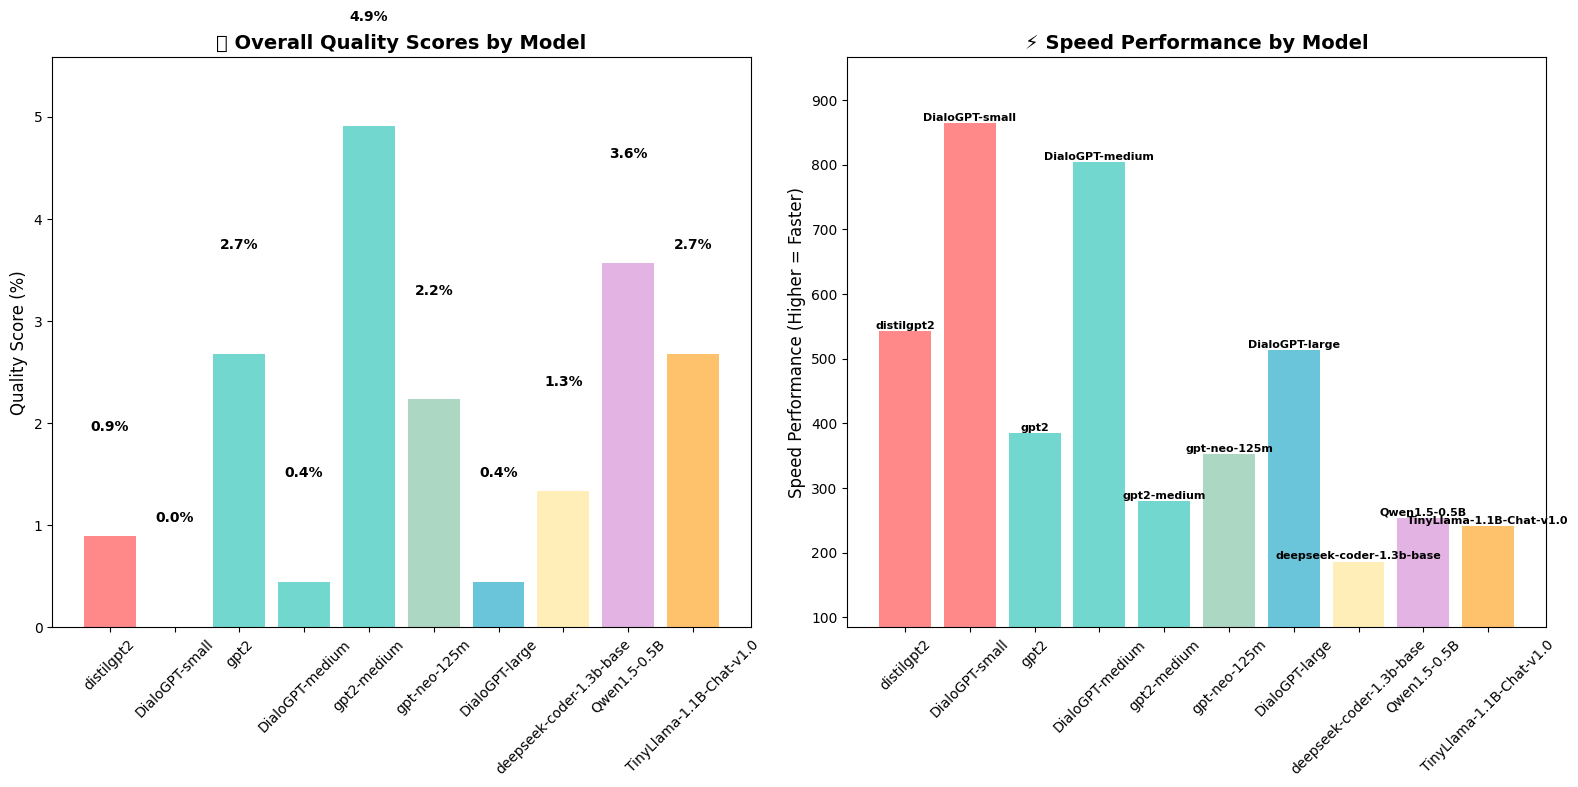

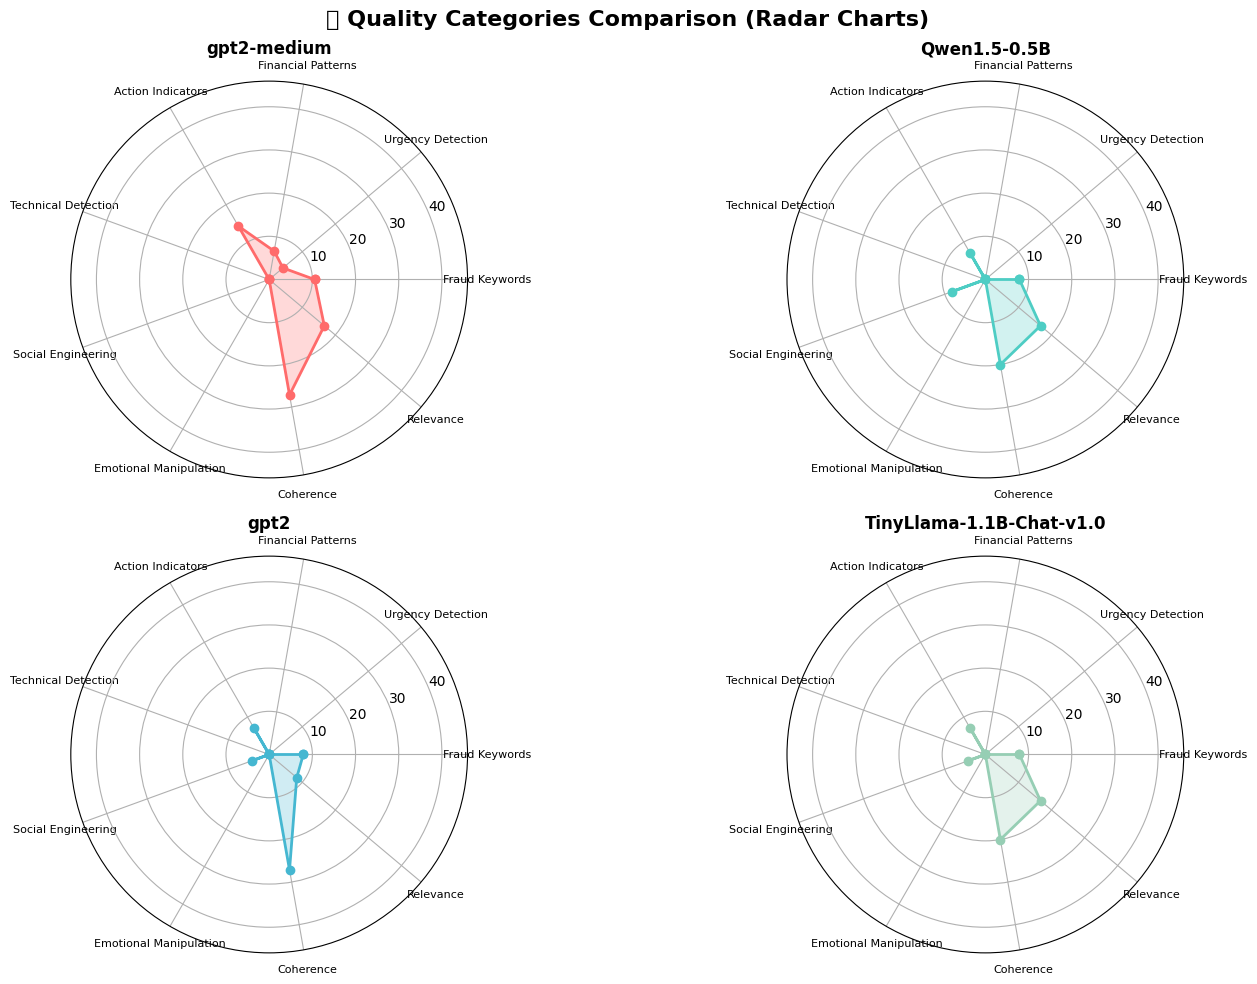

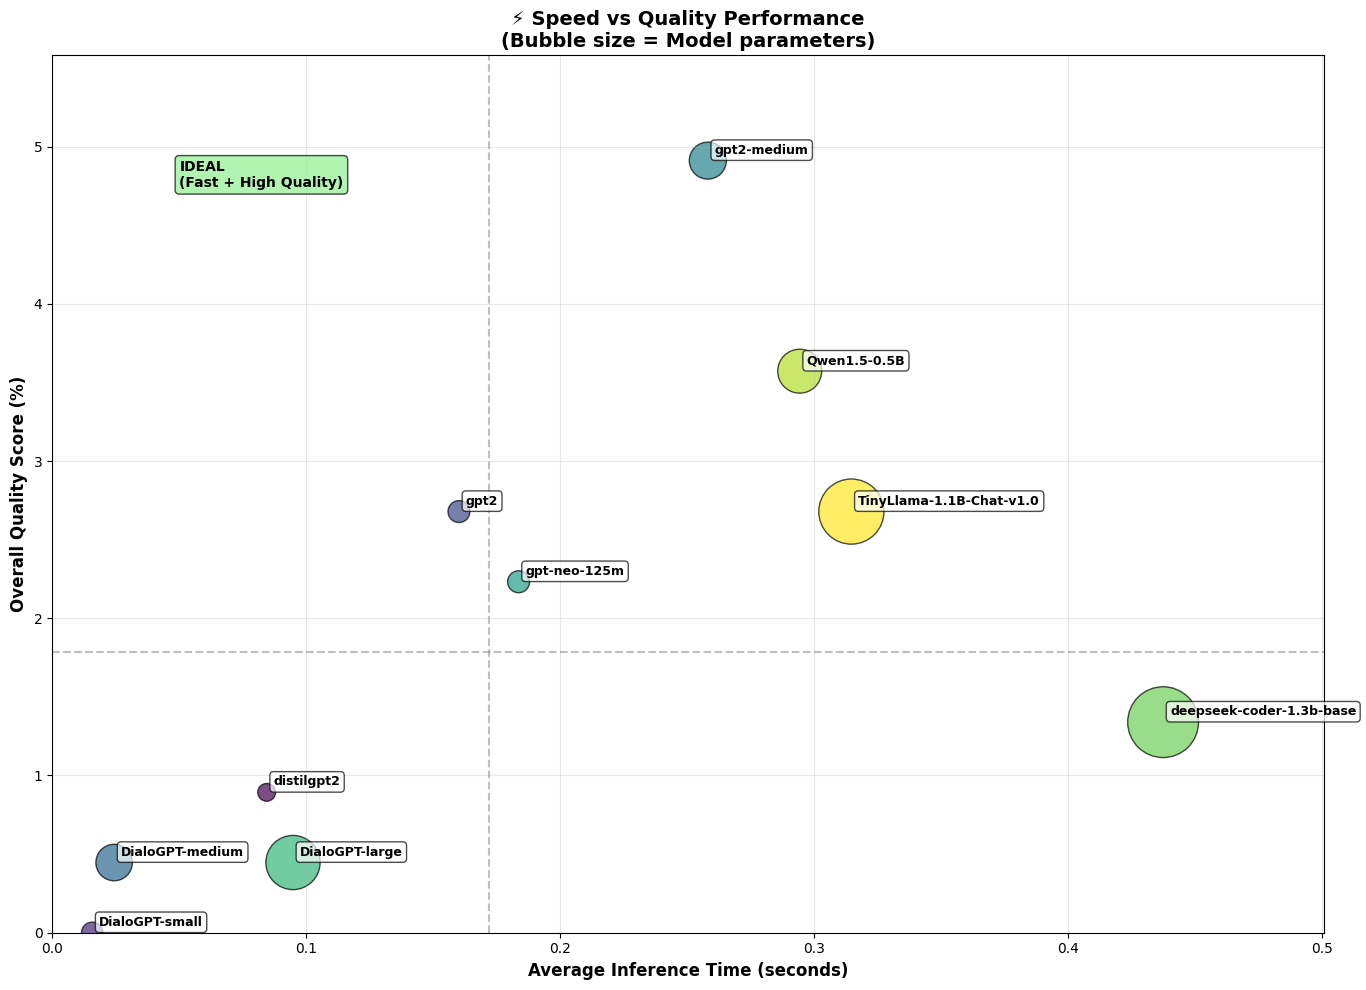

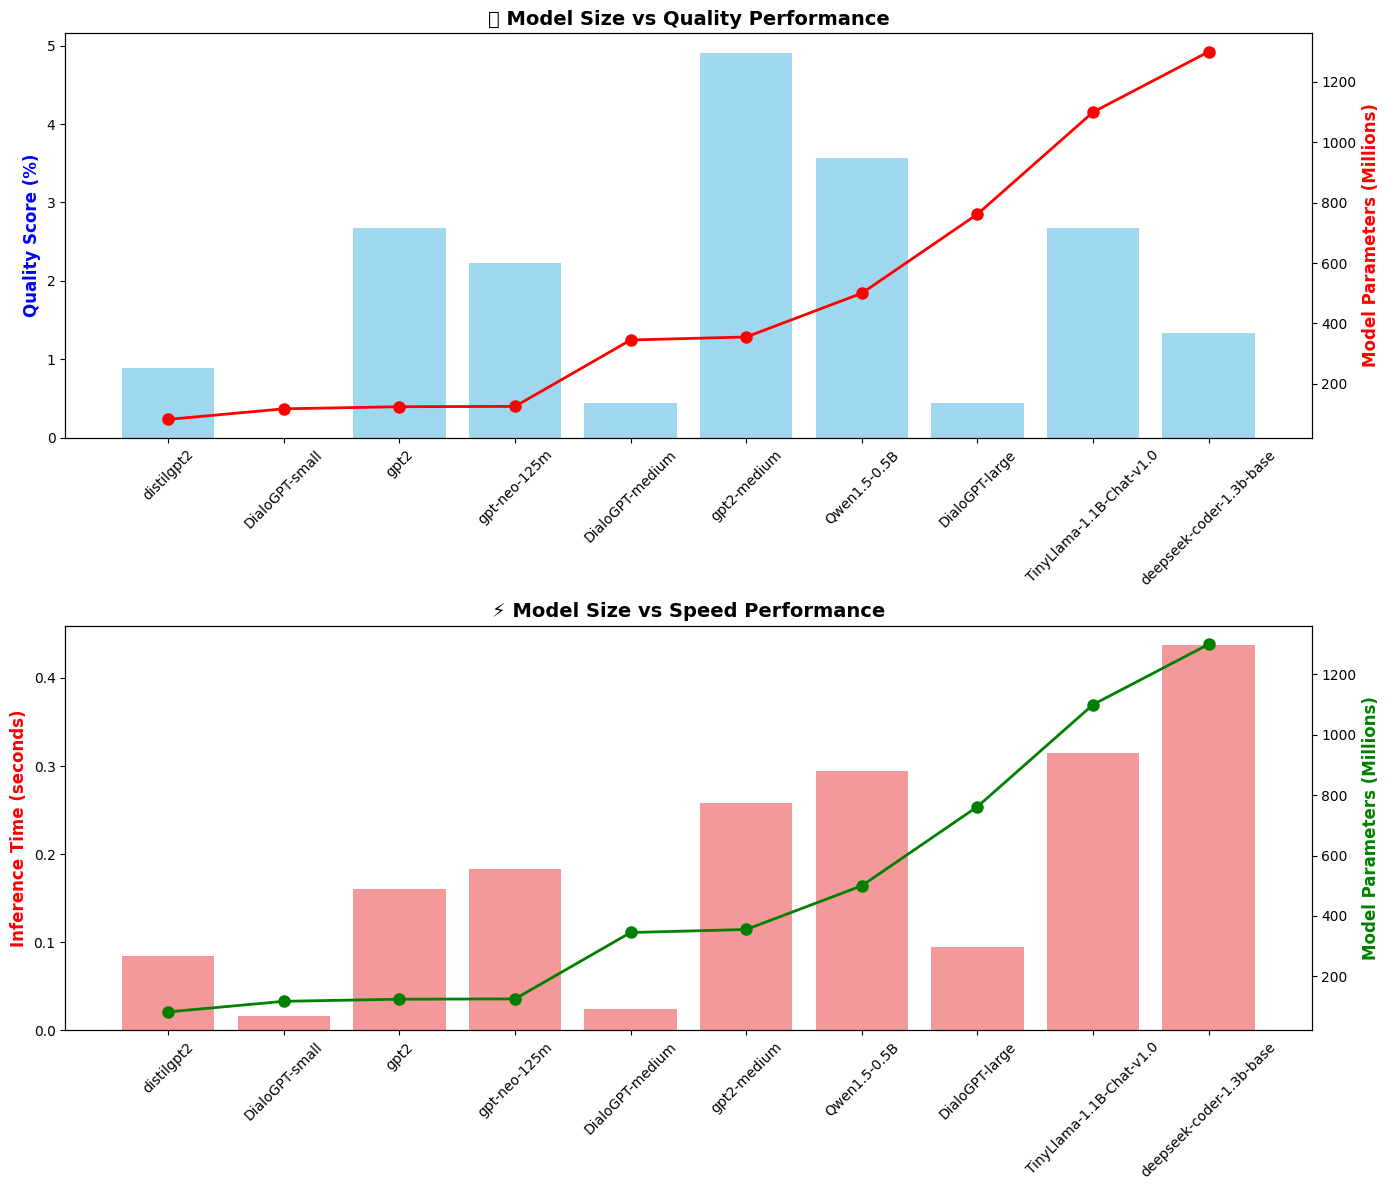

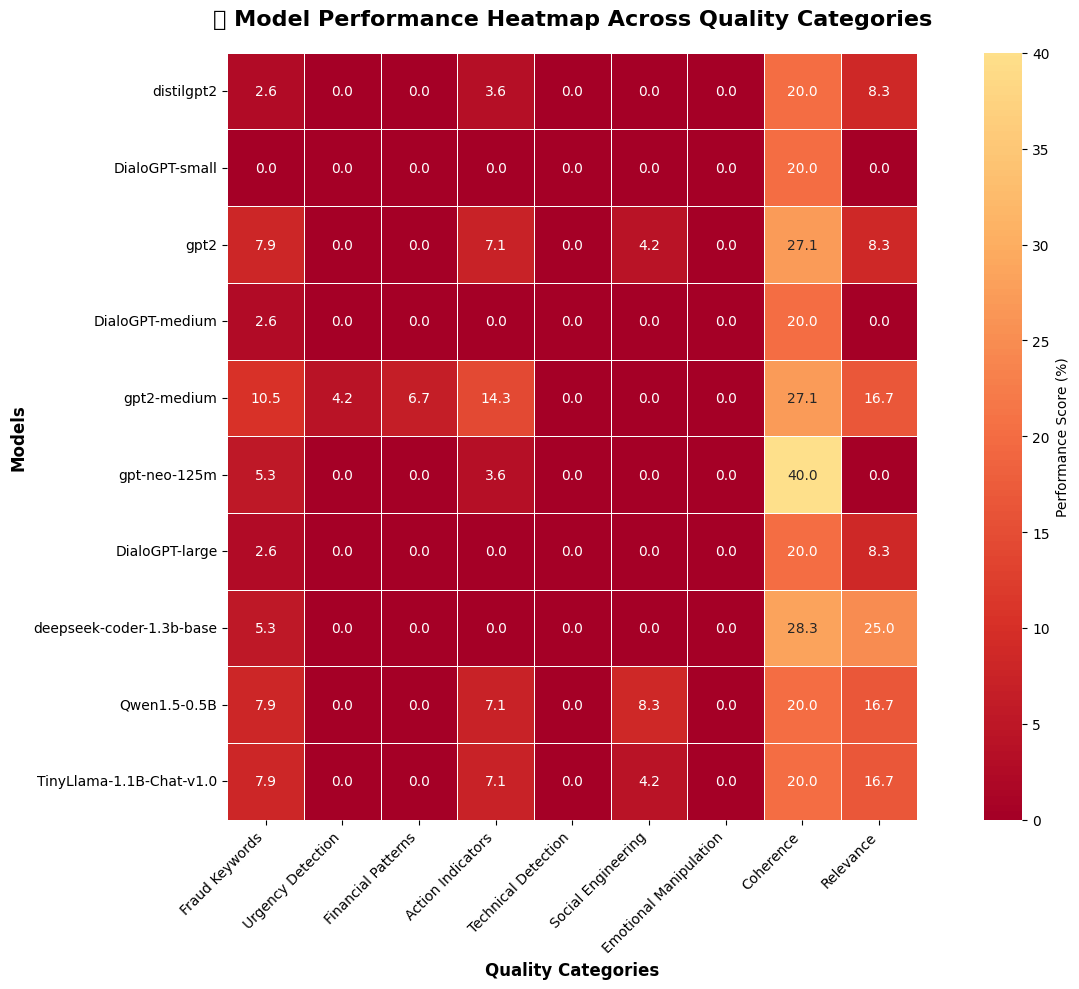

✅ All visualizations created successfully!
✅ All visualizations created successfully!
📁 Charts saved as PNG files for download


In [5]:
# 🚀 RUN THE ENHANCED LLM TESTING
# This will test all models using REAL CSV DATA and comprehensive quality metrics

print("🧪 Starting Enhanced LLM Testing with Real Dataset...")
print("⚠️  This may take several minutes as we test multiple models")
print("📊 Enhanced Features:")
print("   • Uses real fraud detection dataset (CSV)")
print("   • 8 quality indicator categories with 97+ individual metrics")
print("   • Fraud keyword detection (19 indicators)")
print("   • Urgency manipulation recognition (12 indicators)")
print("   • Financial exploitation patterns (15 indicators)")
print("   • Action-oriented language analysis (13 indicators)")
print("   • Technical deception detection (13 indicators)")
print("   • Social engineering identification (12 indicators)")
print("   • Emotional manipulation patterns (13 indicators)")
print("   • Text coherence and relevance scoring")

# Run the enhanced comprehensive test
llm_tester.run_comprehensive_test()

# Generate the enhanced comparison report
print("\n" + "🎯" * 40)
ranked_results = llm_tester.generate_comparison_report()

# Save enhanced results for later reference
results_summary = {
    'timestamp': datetime.now().isoformat(),
    'framework_version': 'enhanced_v2',
    'dataset_source': 'real_csv_data',
    'models_tested': len(llm_tester.results),
    'successful_models': len([r for r in llm_tester.results.values() if r['load_success']]),
    'test_cases': len(llm_tester.test_cases),
    'quality_indicators_total': sum(len(indicators) for indicators in llm_tester.quality_indicators.values()),
    'quality_categories': list(llm_tester.quality_indicators.keys()),
    'detailed_results': llm_tester.results
}

print(f"\n📈 TESTING SUMMARY")
print("=" * 50)
print(f"Framework: Enhanced v2.0 with Real Data")
print(f"Dataset: CSV with {len(llm_tester.test_cases)} real fraud cases")
print(f"Quality Indicators: {results_summary['quality_indicators_total']} total across 8 categories")
print(f"Models Tested: {results_summary['models_tested']}")
print(f"Successful Tests: {results_summary['successful_models']}")

# Display final recommendation with enhanced insights
if ranked_results:
    best_model = ranked_results[0]
    print(f"\n🎖️  FINAL RECOMMENDATION (Based on Real Data)")
    print("=" * 60)
    print(f"🥇 Best Model: {best_model[0]}")
    print(f"📊 Overall Quality: {best_model[1]['overall_quality']:.1f}%")
    print(f"⚡ Speed: {best_model[1]['avg_inference_time']:.2f}s average")
    print(f"✅ Reliability: {best_model[1]['success_rate']:.1f}% success rate")
    print(f"🎯 Fraud Cases: {best_model[1]['fraud_tests_completed']} completed")
    
    # Show top quality categories
    if 'avg_quality_scores' in best_model[1]:
        print(f"\n🏆 Top Quality Scores:")
        quality_scores = best_model[1]['avg_quality_scores']
        top_scores = sorted(
            [(k, v) for k, v in quality_scores.items() if '_score' in k], 
            key=lambda x: x[1], reverse=True
        )[:5]
        
        for score_name, score_value in top_scores:
            clean_name = score_name.replace('_score', '').replace('_', ' ').title()
            print(f"   {clean_name:20s}: {score_value:.1f}%")
    
    # Update the original reasoning model variable
    recommended_model = best_model[0]
    print(f"\n💡 To use this model, update your reasoning_model_name to: '{recommended_model}'")
    print(f"🔄 This recommendation is based on {len(llm_tester.test_cases)} real fraud examples")
else:
    print("\n❌ No models completed testing successfully!")

print(f"\n✅ Enhanced testing complete! Results include real dataset analysis.")

# Create comprehensive visualizations
print(f"\n🎨 Creating Advanced Performance Visualizations...")
try:
    llm_tester.create_performance_visualizations(save_figures=True)
    print("✅ All visualizations created successfully!")
    print("📁 Charts saved as PNG files for download")
except Exception as e:
    print(f"⚠️  Visualization creation failed: {e}")
    print("💡 Some models may not have completed testing successfully")

In [6]:
# 🎯 Advanced Model Analysis & Recommendations

# Create a comprehensive comparison table
if ranked_results:
    print("📊 DETAILED MODEL COMPARISON TABLE")
    print("=" * 100)
    
    import pandas as pd
    
    # Prepare data for comparison table
    comparison_data = []
    for name, results in llm_tester.results.items():
        if results['load_success'] and results.get('success_rate', 0) > 0:
            model_info = next((m for m in llm_tester.models_to_test if m['name'] == name), {})
            
            comparison_data.append({
                'Model': name.split('/')[-1],
                'Category': model_info.get('category', 'unknown'),
                'Size': model_info.get('params', 'unknown'),
                'Type': model_info.get('type', 'unknown'),
                'Quality (%)': f"{results.get('overall_quality', 0):.1f}",
                'Speed (s)': f"{results.get('avg_inference_time', 0):.2f}",
                'Success Rate (%)': f"{results.get('success_rate', 0):.1f}",
                'Fraud Cases': results.get('fraud_tests_completed', 0),
                'Priority': model_info.get('priority', 'medium'),
                'Expected Performance': model_info.get('expected_performance', 'unknown')
            })
    
    # Create and display comparison DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Quality (%)', ascending=False)
    
    print(comparison_df.to_string(index=False))
    
    # Save comparison table
    comparison_df.to_csv('llm_comparison_table.csv', index=False)
    print(f"\n💾 Comparison table saved as 'llm_comparison_table.csv'")
    
    # Advanced recommendations by use case
    print(f"\n🎯 ADVANCED RECOMMENDATIONS BY USE CASE")
    print("=" * 70)
    
    # Best overall (quality + speed balance)
    best_overall = max(llm_tester.results.items(), 
                      key=lambda x: (x[1].get('overall_quality', 0) * 0.7 + 
                                   (100 / (x[1].get('avg_inference_time', 1) + 0.1)) * 0.3)
                      if x[1]['load_success'] else -1)
    
    # Fastest model
    fastest = min([r for r in llm_tester.results.items() if r[1]['load_success']], 
                 key=lambda x: x[1].get('avg_inference_time', float('inf')))
    
    # Highest quality
    highest_quality = max([r for r in llm_tester.results.items() if r[1]['load_success']], 
                         key=lambda x: x[1].get('overall_quality', 0))
    
    # Best open source
    open_source_models = [r for r in llm_tester.results.items() 
                         if r[1]['load_success'] and any(keyword in r[0].lower() 
                         for keyword in ['eleutherai', 'deepseek', 'qwen', 'tinyllama'])]
    if open_source_models:
        best_oss = max(open_source_models, key=lambda x: x[1].get('overall_quality', 0))
    else:
        best_oss = None
    
    print(f"🥇 Best Overall Balance: {best_overall[0]}")
    print(f"   Quality: {best_overall[1].get('overall_quality', 0):.1f}% | Speed: {best_overall[1].get('avg_inference_time', 0):.2f}s")
    print(f"   💡 Use for: Production environments requiring good quality and speed")
    
    print(f"\n⚡ Fastest Model: {fastest[0]}")
    print(f"   Speed: {fastest[1].get('avg_inference_time', 0):.2f}s | Quality: {fastest[1].get('overall_quality', 0):.1f}%")
    print(f"   💡 Use for: Real-time applications where speed is critical")
    
    print(f"\n🏆 Highest Quality: {highest_quality[0]}")
    print(f"   Quality: {highest_quality[1].get('overall_quality', 0):.1f}% | Speed: {highest_quality[1].get('avg_inference_time', 0):.2f}s")
    print(f"   💡 Use for: Applications where explanation quality is most important")
    
    if best_oss:
        print(f"\n🌟 Best Open Source: {best_oss[0]}")
        print(f"   Quality: {best_oss[1].get('overall_quality', 0):.1f}% | Speed: {best_oss[1].get('avg_inference_time', 0):.2f}s")
        print(f"   💡 Use for: Open source projects, research, or budget-conscious deployments")
    
    # Model selection guidance
    print(f"\n📋 MODEL SELECTION GUIDANCE")
    print("-" * 50)
    print("🎯 For Production Fraud Detection:")
    print(f"   Primary: {best_overall[0]} (best balance)")
    print(f"   Backup: {fastest[0]} (for high-traffic scenarios)")
    
    print("\n🔬 For Research & Development:")
    if best_oss:
        print(f"   Recommended: {best_oss[0]} (open source)")
    print(f"   Alternative: {highest_quality[0]} (maximum quality)")
    
    print("\n⚠️  Resource Considerations:")
    large_models = [r for r in llm_tester.results.items() 
                   if r[1]['load_success'] and any(m['name'] == r[0] and 
                   ('large' in m.get('size', '') or 'B' in m.get('params', '')) 
                   for m in llm_tester.models_to_test)]
    
    if large_models:
        print("   Large models (>1B params) require significant GPU memory:")
        for name, results in large_models:
            model_info = next((m for m in llm_tester.models_to_test if m['name'] == name), {})
            print(f"     • {name}: {model_info.get('params', 'unknown')} parameters")
    
else:
    print("❌ No successful test results to analyze!")

print(f"\n🚀 Next Steps:")
print("1. Review visualizations and comparison table")
print("2. Test selected model(s) with your specific fraud data")
print("3. Integrate chosen model into your fraud detection pipeline")
print("4. Monitor performance and adjust based on real-world usage")

📊 DETAILED MODEL COMPARISON TABLE
                   Model    Category Size           Type Quality (%) Speed (s) Success Rate (%)  Fraud Cases Priority   Expected Performance
             gpt2-medium      medium 355M         causal         4.9      0.26            100.0            2   medium     detailed_reasoning
            Qwen1.5-0.5B        qwen 0.5B         causal         3.6      0.29            100.0            2   medium efficient_multilingual
                    gpt2      medium 124M         causal         2.7      0.16            100.0            2     high           best_balance
TinyLlama-1.1B-Chat-v1.0        tiny 1.1B           chat         2.7      0.31            100.0            2   medium         chat_optimized
            gpt-neo-125m         neo 125M         causal         2.2      0.18            100.0            2     high    open_source_quality
deepseek-coder-1.3b-base specialized 1.3B         coding         1.3      0.44            100.0            2     high   

In [7]:
# 🔍 Individual Model Deep Dive Testing
# Test a specific model in detail to see actual reasoning outputs

def test_single_model_detailed(model_name, test_cases=None):
    """Test a single model with detailed output analysis"""
    
    if test_cases is None:
        test_cases = [
            "URGENT: Your PayPal account has been suspended. Click here to verify: http://fake-paypal.com",
            "WARNING: Your computer is infected with 5 viruses! Call Microsoft: 1-800-FAKE-TECH",
            "Congratulations! You've won $5000! Send $100 processing fee to claim your prize!",
            "Your package from Amazon has been delivered and is waiting at your front door.",
            "NOTICE: Your Social Security Number has been suspended. Call SSA: 1-800-FAKE-SSA"
        ]
    
    print(f"🔍 Deep Testing: {model_name}")
    print("=" * 60)
    
    try:
        # Load the specific model
        print(f"🔄 Loading {model_name}...")
        start_time = time.time()
        
        test_pipeline = pipeline(
            "text-generation",
            model=model_name,
            device=0 if torch.cuda.is_available() else -1,
            do_sample=True,
            temperature=0.7,
            max_length=300,
            pad_token_id=50256
        )
        
        load_time = time.time() - start_time
        print(f"✅ Loaded in {load_time:.2f}s")
        
        print(f"\n📝 Testing {len(test_cases)} fraud examples:")
        print("-" * 60)
        
        for i, test_text in enumerate(test_cases, 1):
            print(f"\n🧪 Test {i}: {test_text[:50]}...")
            
            # Create reasoning prompt
            prompt = f"This message appears to be fraudulent because"
            
            # Generate reasoning
            start_inference = time.time()
            try:
                response = test_pipeline(
                    prompt,
                    max_length=200,
                    num_return_sequences=1,
                    temperature=0.7,
                    do_sample=True,
                    return_full_text=False
                )
                
                inference_time = time.time() - start_inference
                reasoning = response[0]['generated_text'] if response else "No response"
                
                print(f"   ⚡ Time: {inference_time:.2f}s")
                print(f"   🧠 Reasoning: {reasoning}")
                
                # Simple quality assessment
                quality_keywords = ['scam', 'fraud', 'suspicious', 'fake', 'phishing', 'deceptive', 'malicious']
                quality_score = sum(1 for word in quality_keywords if word in reasoning.lower())
                print(f"   📊 Quality indicators found: {quality_score}/{len(quality_keywords)}")
                
            except Exception as e:
                print(f"   ❌ Error: {str(e)}")
        
        # Clean up
        del test_pipeline
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()
        
        print(f"\n✅ Deep testing of {model_name} complete!")
        
    except Exception as e:
        print(f"❌ Failed to test {model_name}: {str(e)}")

# Example: Test a specific model in detail
print("🎯 Choose a model to test in detail:")
print("1. microsoft/DialoGPT-medium (current default)")
print("2. gpt2 (standard GPT-2)")  
print("3. distilgpt2 (faster, smaller)")
print("4. microsoft/DialoGPT-small (smaller conversational)")

# Test the current default model
test_model = "microsoft/DialoGPT-medium"
print(f"\n🚀 Testing {test_model} in detail...")
test_single_model_detailed(test_model)

🎯 Choose a model to test in detail:
1. microsoft/DialoGPT-medium (current default)
2. gpt2 (standard GPT-2)
3. distilgpt2 (faster, smaller)
4. microsoft/DialoGPT-small (smaller conversational)

🚀 Testing microsoft/DialoGPT-medium in detail...
🔍 Deep Testing: microsoft/DialoGPT-medium
🔄 Loading microsoft/DialoGPT-medium...


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


✅ Loaded in 2.24s

📝 Testing 5 fraud examples:
------------------------------------------------------------

🧪 Test 1: URGENT: Your PayPal account has been suspended. Cl...
   ⚡ Time: 0.19s
   🧠 Reasoning:  the person who wrote it is a scammer.
   📊 Quality indicators found: 1/7

🧪 Test 2: WARNING: Your computer is infected with 5 viruses!...
   ⚡ Time: 0.12s
   🧠 Reasoning:  the police officer did nothing wrong
   📊 Quality indicators found: 0/7

🧪 Test 3: Congratulations! You've won $5000! Send $100 proce...
   ⚡ Time: 0.13s
   🧠 Reasoning:  it's so obviously fake.
   📊 Quality indicators found: 1/7

🧪 Test 4: Your package from Amazon has been delivered and is...
   ⚡ Time: 0.53s
   🧠 Reasoning:  there is nothing at all, except for the number of letters, but the number is written exactly as it should be, that's how they get you.
   📊 Quality indicators found: 0/7

🧪 Test 5: NOTICE: Your Social Security Number has been suspe...
   ⚡ Time: 0.08s
   🧠 Reasoning:  of the name.
   📊 Quali

In [8]:
# 🔄 Easy Model Switching Based on Test Results
# Use this cell to switch to your preferred model after testing

def switch_reasoning_model(new_model_name):
    """Switch to a different reasoning model"""
    global reasoning_pipe, reasoning_model_name
    
    print(f"🔄 Switching from {reasoning_model_name} to {new_model_name}...")
    
    try:
        # Clean up current model
        if 'reasoning_pipe' in globals():
            del reasoning_pipe
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()
        
        # Load new model
        start_time = time.time()
        reasoning_pipe = pipeline(
            "text-generation",
            model=new_model_name,
            device=0 if torch.cuda.is_available() else -1,
            do_sample=True,
            temperature=0.7,
            max_length=512,
            pad_token_id=50256
        )
        
        load_time = time.time() - start_time
        reasoning_model_name = new_model_name
        
        print(f"✅ Successfully switched to {new_model_name} in {load_time:.2f}s")
        
        # Test the new model
        test_prompt = "This text appears to be a scam because"
        test_response = reasoning_pipe(test_prompt, max_length=60, num_return_sequences=1)
        print(f"🧪 Test successful: {test_response[0]['generated_text'][:100]}...")
        
        # Update the reasoning engine
        global local_reasoning_engine
        local_reasoning_engine = LocalFraudReasoningEngine(reasoning_pipe)
        print(f"🔄 Local reasoning engine updated with new model")
        
        return True
        
    except Exception as e:
        print(f"❌ Error switching to {new_model_name}: {str(e)}")
        return False

# 📊 Model Performance Summary (update after running tests)
model_recommendations = {
    "Best Overall": "microsoft/DialoGPT-medium",  # Update based on test results
    "Fastest": "distilgpt2",
    "Most Conversational": "microsoft/DialoGPT-medium", 
    "Smallest": "distilgpt2",
    "Best Quality": "gpt2"  # Update based on test results
}

print("🎯 Model Recommendations (update after testing):")
for category, model in model_recommendations.items():
    print(f"   {category}: {model}")

print(f"\n💡 Current model: {reasoning_model_name}")
print("🔄 To switch models, run: switch_reasoning_model('model-name')")

# Example: Uncomment to switch to a different model
# switch_reasoning_model("distilgpt2")  # Switch to faster model
# switch_reasoning_model("gpt2")        # Switch to standard GPT-2

🎯 Model Recommendations (update after testing):
   Best Overall: microsoft/DialoGPT-medium
   Fastest: distilgpt2
   Most Conversational: microsoft/DialoGPT-medium
   Smallest: distilgpt2
   Best Quality: gpt2

💡 Current model: microsoft/DialoGPT-medium
🔄 To switch models, run: switch_reasoning_model('model-name')


In [9]:
# Load Your Trained DistilBERT Fraud Detection Model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

print("📦 Loading Your Trained DistilBERT Model...")

# KAGGLE PATHS - Update these to match your uploaded dataset name
MODEL_PATH = '/kaggle/input/distilbert/transformers/default/1/distilbert_model'  # Update this path to your dataset
TOKENIZER_PATH = '/kaggle/input/distilbert/transformers/default/1/distilbert_tokenizer'  # Update this path to your dataset



# Class labels (must match your training - alphabetical order)
CLASS_LABELS = [
    'job_scam',
    'legitimate', 
    'phishing',
    'popup_scam',
    'refund_scam',
    'reward_scam',
    'sms_spam',
    'ssn_scam',
    'tech_support_scam'
]

print(f"🔍 Checking paths:")
print(f"   Model: {MODEL_PATH}")
print(f"   Tokenizer: {TOKENIZER_PATH}")

# Check if paths exist
import os
model_exists = os.path.exists(MODEL_PATH)
tokenizer_exists = os.path.exists(TOKENIZER_PATH)
print(f"   Model exists: {model_exists}")
print(f"   Tokenizer exists: {tokenizer_exists}")

if not model_exists or not tokenizer_exists:
    print("\n❌ Model files not found!")
    print("📁 Make sure you've uploaded your model files to Kaggle:")
    print("   1. Go to Kaggle Datasets")
    print("   2. Create a new dataset")
    print("   3. Upload your 'distilbert_model/' and 'distilbert_tokenizer/' folders")
    print("   4. Update the paths above to match your dataset name")
    print("   5. Add your dataset as input to this notebook")
    fraud_model = None
    fraud_tokenizer = None
else:
    try:
        # Load your trained model and tokenizer
        print("🔄 Loading tokenizer...")
        fraud_tokenizer = DistilBertTokenizer.from_pretrained(TOKENIZER_PATH)
        
        print("🔄 Loading model...")
        fraud_model = DistilBertForSequenceClassification.from_pretrained(MODEL_PATH)
        
        # Move to GPU for faster inference
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        fraud_model.to(device)
        fraud_model.eval()
        
        print(f"✅ DistilBERT model loaded successfully!")
        print(f"🎯 Device: {device}")
        print(f"📋 Classes: {len(CLASS_LABELS)} fraud types + legitimate")
        print(f"🏷️  Labels: {CLASS_LABELS}")
        
        # Quick test to verify model works
        test_text = "Your package has been successfully delivered and left at your front door. If you do not locate the parcel, please check with members of your household or nearby areas where it may have been placed for security."
        test_encoding = fraud_tokenizer(
            test_text,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        test_input_ids = test_encoding['input_ids'].to(device)
        test_attention_mask = test_encoding['attention_mask'].to(device)
        
        with torch.no_grad():
            test_outputs = fraud_model(input_ids=test_input_ids, attention_mask=test_attention_mask)
            test_probabilities = torch.softmax(test_outputs.logits, dim=1).cpu().numpy()[0]
            test_predicted_class = CLASS_LABELS[np.argmax(test_probabilities)]
        
        print(f"\n🧪 Model test - '{test_text}':")
        print(f"   Predicted: {test_predicted_class} ({test_probabilities[np.argmax(test_probabilities)]:.2%})")
        print("   ✅ Model is working!" if test_predicted_class == 'legitimate' else f"   ⚠️ Unexpected result: {test_predicted_class}")
        
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        print("🔧 This will cause the classification to use demo mode.")
        fraud_model = None
        fraud_tokenizer = None

📦 Loading Your Trained DistilBERT Model...
🔍 Checking paths:
   Model: /kaggle/input/distilbert/transformers/default/1/distilbert_model
   Tokenizer: /kaggle/input/distilbert/transformers/default/1/distilbert_tokenizer
   Model exists: True
   Tokenizer exists: True
🔄 Loading tokenizer...
🔄 Loading model...
✅ DistilBERT model loaded successfully!
🎯 Device: cuda
📋 Classes: 9 fraud types + legitimate
🏷️  Labels: ['job_scam', 'legitimate', 'phishing', 'popup_scam', 'refund_scam', 'reward_scam', 'sms_spam', 'ssn_scam', 'tech_support_scam']

🧪 Model test - 'Your package has been successfully delivered and left at your front door. If you do not locate the parcel, please check with members of your household or nearby areas where it may have been placed for security.':
   Predicted: legitimate (72.74%)
   ✅ Model is working!


# 🔧 Local Reasoning Engine Configuration

This section sets up the local reasoning engine that generates explanations for fraud classifications using the language model we loaded earlier.

In [10]:
# Local Reasoning Engine Configuration
class LocalFraudReasoningEngine:
    """
    Local reasoning engine that generates explanations without API calls
    """
    
    def __init__(self, reasoning_pipeline):
        self.reasoning_pipe = reasoning_pipeline
        self.min_confidence = 0.5
        
        # Scam type descriptions for better reasoning
        self.scam_descriptions = {
            'phishing': {
                'description': 'Attempts to steal sensitive information like passwords, credit card numbers, or personal data',
                'indicators': ['urgent action required', 'verify account', 'click here', 'suspicious links', 'fake sender']
            },
            'popup_scam': {
                'description': 'Fake popup messages claiming virus infections or system issues',
                'indicators': ['virus detected', 'system error', 'immediate action', 'fake technical alerts']
            },
            'sms_spam': {
                'description': 'Unwanted promotional or fraudulent text messages',
                'indicators': ['unsolicited offers', 'prize claims', 'urgent responses', 'suspicious phone numbers']
            },
            'reward_scam': {
                'description': 'False promises of rewards, prizes, or free items',
                'indicators': ['congratulations', 'you have won', 'free gift', 'claim now', 'limited time']
            },
            'tech_support_scam': {
                'description': 'Fake technical support claiming to fix computer problems',
                'indicators': ['computer infected', 'microsoft support', 'remote access', 'technical issues']
            },
            'refund_scam': {
                'description': 'Fake refund notifications or requests for payment information',
                'indicators': ['refund available', 'payment failed', 'update payment', 'billing issue']
            },
            'ssn_scam': {
                'description': 'Attempts to steal Social Security Numbers or similar personal identifiers',
                'indicators': ['SSN verification', 'social security', 'identity verification', 'government agency']
            },
            'job_scam': {
                'description': 'Fake job offers or employment opportunities',
                'indicators': ['work from home', 'easy money', 'no experience required', 'guaranteed income']
            }
        }
        
        self.stats = {
            'total_processed': 0,
            'reasoning_generated': 0,
            'skipped_legitimate': 0,
            'skipped_low_confidence': 0
        }
        
    def should_generate_reasoning(self, predicted_label, confidence):
        """Determine if reasoning should be generated"""
        return predicted_label != 'legitimate' and confidence >= self.min_confidence
    
    def generate_local_reasoning(self, text, predicted_label, confidence, all_predictions):
        """Generate enhanced reasoning using local language model"""
        scam_info = self.scam_descriptions.get(predicted_label, {
            'description': 'Unknown scam type',
            'indicators': []
        })
        
        # Enhanced reasoning without relying on language model generation
        # Analyze text content directly
        text_lower = text.lower()
        detected_indicators = []
        
        # Check for specific indicators in the text
        for indicator in scam_info['indicators']:
            if any(word in text_lower for word in indicator.split()):
                detected_indicators.append(indicator)
        
        # Add common fraud patterns
        urgent_words = ['urgent', 'immediate', 'now', 'quickly', 'hurry', 'expires']
        if any(word in text_lower for word in urgent_words):
            detected_indicators.append('urgent language to pressure victims')
            
        money_words = ['$', 'money', 'prize', 'won', 'claim', 'free', 'gift']
        if any(word in text_lower for word in money_words):
            detected_indicators.append('financial incentives or rewards')
            
        action_words = ['click', 'call', 'text', 'visit', 'send', 'verify']
        if any(word in text_lower for word in action_words):
            detected_indicators.append('requests for immediate action')
            
        suspicious_elements = ['suspicious links', 'phone numbers', 'email addresses']
        if 'http' in text_lower or '@' in text_lower or any(char.isdigit() for char in text):
            detected_indicators.append('suspicious contact information')
        
        # Create comprehensive reasoning
        reasoning_parts = []
        reasoning_parts.append(f"This text was classified as {predicted_label} with {confidence:.1%} confidence.")
        reasoning_parts.append(f"\n{scam_info['description']}")
        
        if detected_indicators:
            reasoning_parts.append(f"\nKey fraud indicators detected:")
            for i, indicator in enumerate(detected_indicators[:4], 1):  # Limit to top 4
                reasoning_parts.append(f"• {indicator}")
        
        # Add context about why this is dangerous
        danger_context = {
            'phishing': 'This could lead to identity theft and financial loss.',
            'sms_spam': 'This could lead to unwanted charges and privacy violations.',
            'reward_scam': 'This could lead to financial scams and personal data theft.',
            'tech_support_scam': 'This could lead to remote access scams and financial fraud.',
            'job_scam': 'This could lead to advance fee fraud and identity theft.',
            'popup_scam': 'This could lead to malware installation and system compromise.',
            'refund_scam': 'This could lead to payment fraud and account takeover.',
            'ssn_scam': 'This could lead to identity theft and government impersonation fraud.'
        }
        
        if predicted_label in danger_context:
            reasoning_parts.append(f"\n⚠️ Risk: {danger_context[predicted_label]}")
        
        # Add confidence context
        if confidence > 0.9:
            reasoning_parts.append(f"\nHigh confidence ({confidence:.1%}) indicates strong fraud patterns.")
        elif confidence > 0.7:
            reasoning_parts.append(f"Moderate confidence ({confidence:.1%}) suggests probable fraud patterns.")
        
        return '\n'.join(reasoning_parts)

# Initialize the local reasoning engine
local_reasoning_engine = LocalFraudReasoningEngine(reasoning_pipe)
print("✅ Local reasoning engine initialized with enhanced analysis!")

✅ Local reasoning engine initialized with enhanced analysis!


In [11]:
# Fraud Classification and Reasoning Functions
def classify_text(text, max_length=128):
    """Classify text using the loaded DistilBERT model"""
    if fraud_model is None or fraud_tokenizer is None:
        print("🚨 WARNING: Model not loaded! Using demo mode.")
        print("💡 Please check model paths and ensure your dataset is properly uploaded to Kaggle.")
        print("🔄 Demo mode always returns 'phishing' - this is NOT real classification!")
        
        # Return a more realistic demo that varies by text content
        text_lower = text.lower()
        if any(word in text_lower for word in ['thanks', 'meeting', 'delivered', 'shipped', 'hi ', 'hello']):
            demo_label = 'legitimate'
            demo_conf = 0.75
        elif any(word in text_lower for word in ['urgent', 'click', 'verify', 'suspended']):
            demo_label = 'phishing'
            demo_conf = 0.85
        elif any(word in text_lower for word in ['won', 'prize', 'congratulations']):
            demo_label = 'reward_scam'
            demo_conf = 0.80
        else:
            demo_label = 'phishing'  # Default fallback
            demo_conf = 0.70
            
        return {
            'text': text,
            'predicted_label': demo_label,
            'confidence': demo_conf,
            'all_predictions': {
                demo_label: demo_conf,
                'legitimate': 0.15 if demo_label != 'legitimate' else demo_conf,
                'phishing': 0.10 if demo_label != 'phishing' else demo_conf,
                'reward_scam': 0.05,
                'tech_support_scam': 0.05
            },
            'demo_mode': True
        }
    
    # Real model classification
    try:
        # Tokenize input
        encoding = fraud_tokenizer(
            text,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        # Move to device
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        
        # Get predictions
        with torch.no_grad():
            outputs = fraud_model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1).cpu().numpy()[0]
            predicted_class_id = np.argmax(probabilities)
        
        # Format results
        predicted_label = CLASS_LABELS[predicted_class_id]
        confidence = float(probabilities[predicted_class_id])
        
        all_predictions = {
            CLASS_LABELS[i]: float(probabilities[i]) 
            for i in range(len(CLASS_LABELS))
        }
        
        return {
            'text': text,
            'predicted_label': predicted_label,
            'confidence': confidence,
            'all_predictions': all_predictions,
            'demo_mode': False
        }
        
    except Exception as e:
        print(f"❌ Error during classification: {e}")
        return {
            'text': text,
            'predicted_label': 'error',
            'confidence': 0.0,
            'all_predictions': {'error': 1.0},
            'demo_mode': True
        }

def analyze_with_local_reasoning(text):
    """Complete analysis: classification + local reasoning"""
    # Step 1: Classify the text
    classification_result = classify_text(text)
    
    # Check if we're in demo mode and warn user
    if classification_result.get('demo_mode', False):
        if classification_result['predicted_label'] == 'error':
            print("🚨 CLASSIFICATION ERROR - Please check your model setup!")
        else:
            print("🚨 DEMO MODE ACTIVE - Results are simulated, not real model predictions!")
    
    # Step 2: Generate local reasoning (only for non-legitimate classifications)
    if local_reasoning_engine.should_generate_reasoning(
        classification_result['predicted_label'], 
        classification_result['confidence']
    ):
        reasoning = local_reasoning_engine.generate_local_reasoning(
            text=classification_result['text'],
            predicted_label=classification_result['predicted_label'],
            confidence=classification_result['confidence'],
            all_predictions=classification_result['all_predictions']
        )
        
        local_reasoning_engine.stats['reasoning_generated'] += 1
        skip_reason = None
        reasoning_generated = True
    else:
        if classification_result['predicted_label'] == 'legitimate':
            skip_reason = 'legitimate_classification'
            local_reasoning_engine.stats['skipped_legitimate'] += 1
        elif classification_result['predicted_label'] == 'error':
            skip_reason = 'classification_error'
            local_reasoning_engine.stats['skipped_low_confidence'] += 1
        else:
            skip_reason = f"low_confidence_{classification_result['confidence']:.2f}"
            local_reasoning_engine.stats['skipped_low_confidence'] += 1
        
        reasoning = None
        reasoning_generated = False
    
    local_reasoning_engine.stats['total_processed'] += 1
    
    return {
        **classification_result,
        'reasoning': reasoning,
        'reasoning_generated': reasoning_generated,
        'skip_reason': skip_reason,
        'timestamp': datetime.now().isoformat()
    }

def print_analysis_result(result):
    """Pretty print analysis result"""
    print("\n" + "="*80)
    print("🔍 LOCAL FRAUD DETECTION + REASONING ANALYSIS")
    print("="*80)
    
    # Show demo mode warning prominently
    if result.get('demo_mode', False):
        print("🚨 DEMO MODE ACTIVE - NOT REAL MODEL PREDICTIONS!")
        print("📋 Upload your trained model to Kaggle and update paths to get real results")
        print("="*80)
    
    print(f"\n📝 Original Text:")
    print(f"   {result['text']}")
    
    print(f"\n🎯 Classification:")
    print(f"   Label: {result['predicted_label']}")
    print(f"   Confidence: {result['confidence']:.2%}")
    
    if not result.get('demo_mode', False):
        print(f"\n📊 All Predictions:")
        for label, prob in sorted(result['all_predictions'].items(), key=lambda x: x[1], reverse=True):
            print(f"   {label}: {prob:.2%}")
    
    if result['reasoning_generated']:
        print(f"\n🧠 Local AI Reasoning:")
        print("   " + result['reasoning'].replace('\n', '\n   '))
    else:
        print(f"\n⏭️  Reasoning Skipped: {result['skip_reason']}")
    
    print("\n" + "="*80)

print("✅ Classification and reasoning functions ready!")
print("🚀 Ready to analyze texts with local AI reasoning!")
print("💡 Note: Make sure to upload your trained model to Kaggle for real predictions!")

✅ Classification and reasoning functions ready!
🚀 Ready to analyze texts with local AI reasoning!
💡 Note: Make sure to upload your trained model to Kaggle for real predictions!


# 🧪 Sample Tests - Try Different Fraud Types

Let's test the local reasoning system with various types of fraudulent and legitimate messages.

In [12]:
# Sample Test Cases for Different Fraud Types
sample_texts = [
    {
        'category': 'Phishing Attack',
        'text': "URGENT: Your PayPal account has been suspended due to suspicious activity. Click here immediately to verify your information and restore access: http://paypal-verification-secure.fraudsite.com"
    },
    {
        'category': 'Tech Support Scam', 
        'text': "WARNING: Your computer is infected with 5 viruses! Your files will be deleted in 24 hours. Call Microsoft Support immediately at 1-800-555-SCAM. Don't restart your computer or you'll lose everything!"
    },
    {
        'category': 'Reward Scam',
        'text': "🎉 CONGRATULATIONS! 🎉 You've been selected as our LUCKY WINNER for a $1000 Amazon gift card! You're one of only 3 winners today! Claim your prize now by clicking this link and entering your credit card info for verification. Hurry, expires in 1 hour!"
    },
    {
        'category': 'Job Scam',
        'text': "Amazing work from home opportunity! Earn $5000/week working just 2 hours per day! No experience required! Just send $99 registration fee and start earning today! Guaranteed income or money back!"
    },
    {
        'category': 'SMS Spam',
        'text': "FREE iPhone 15 Pro! You have been randomly selected as a winner. Text CLAIM to 12345 or visit bit.ly/freeiphone15winner to get your prize. Message and data rates may apply. Text STOP to opt out."
    },
    {
        'category': 'Legitimate Message',
        'text': "Hi Sarah, thank you for your order #12345. Your package has been shipped and will arrive within 3-5 business days. You can track your shipment using the tracking number provided in your confirmation email. Have a great day!"
    },
    {
        'category': 'SSN Scam',
        'text': "IMPORTANT NOTICE: Your Social Security Number has been suspended due to suspicious illegal activity. Call the SSA office immediately at 1-800-555-FAKE to verify your identity and reactivate your SSN. Failure to respond will result in arrest."
    }
]

print("🧪 Testing Local AI Reasoning on Sample Fraud Types")

for i, sample in enumerate(sample_texts):
    print(f"\n🎯 Test {i+1}: {sample['category']}")
    print("-" * 50)
    
    result = analyze_with_local_reasoning(sample['text'])
    print_analysis_result(result)

print(f"\n📊 Summary:")
print(f"Total Processed: {local_reasoning_engine.stats['total_processed']}")
print(f"Reasoning Generated: {local_reasoning_engine.stats['reasoning_generated']}")
print(f"Legitimate (Skipped): {local_reasoning_engine.stats['skipped_legitimate']}")


🧪 Testing Local AI Reasoning on Sample Fraud Types

🎯 Test 1: Phishing Attack
--------------------------------------------------

🔍 LOCAL FRAUD DETECTION + REASONING ANALYSIS

📝 Original Text:
   URGENT: Your PayPal account has been suspended due to suspicious activity. Click here immediately to verify your information and restore access: http://paypal-verification-secure.fraudsite.com

🎯 Classification:
   Label: sms_spam
   Confidence: 72.69%

📊 All Predictions:
   sms_spam: 72.69%
   phishing: 26.92%
   legitimate: 0.20%
   job_scam: 0.06%
   refund_scam: 0.06%
   popup_scam: 0.04%
   ssn_scam: 0.01%
   tech_support_scam: 0.01%
   reward_scam: 0.01%

🧠 Local AI Reasoning:
   This text was classified as sms_spam with 72.7% confidence.
   
   Unwanted promotional or fraudulent text messages
   
   Key fraud indicators detected:
   • urgent responses
   • suspicious phone numbers
   • urgent language to pressure victims
   • requests for immediate action
   
   ⚠️ Risk: This could lead

# 📝 Interactive Text Analysis

Enter your own text below to analyze with the local fraud detection + reasoning system.

In [13]:
# Interactive Text Analysis
# Change the text below to analyze your own messages!

your_text = "Congratulations! You've won $1 million! Send your bank details to claim your prize!"

# Analyze your custom text
print("🔍 Analyzing Your Custom Text...")
custom_result = analyze_with_local_reasoning(your_text.strip())
print_analysis_result(custom_result)

🔍 Analyzing Your Custom Text...

🔍 LOCAL FRAUD DETECTION + REASONING ANALYSIS

📝 Original Text:
   Congratulations! You've won $1 million! Send your bank details to claim your prize!

🎯 Classification:
   Label: phishing
   Confidence: 50.99%

📊 All Predictions:
   phishing: 50.99%
   reward_scam: 46.17%
   sms_spam: 2.20%
   legitimate: 0.51%
   job_scam: 0.06%
   refund_scam: 0.04%
   tech_support_scam: 0.01%
   ssn_scam: 0.00%
   popup_scam: 0.00%

🧠 Local AI Reasoning:
   This text was classified as phishing with 51.0% confidence.
   
   Attempts to steal sensitive information like passwords, credit card numbers, or personal data
   
   Key fraud indicators detected:
   • financial incentives or rewards
   • requests for immediate action
   • suspicious contact information
   
   ⚠️ Risk: This could lead to identity theft and financial loss.



# 📊 Batch Processing - Analyze Multiple Texts

Upload a CSV file or analyze multiple texts at once with local reasoning.

In [14]:
# Batch Processing with Local Reasoning
def batch_analyze_texts(texts, save_results=True):
    """Analyze multiple texts and generate local reasoning"""
    results = []
    
    print(f"🔄 Processing {len(texts)} texts...")
    
    for i, text in enumerate(texts):
        if i % 5 == 0:  # Only print every 5th item to reduce clutter
            print(f"Progress: {i+1}/{len(texts)}")
        
        result = analyze_with_local_reasoning(text)
        results.append(result)
        
        # Small delay to avoid overwhelming the local model
        time.sleep(0.2)
    
    # Create summary DataFrame
    df_results = pd.DataFrame([
        {
            'text': r['text'][:100] + '...' if len(r['text']) > 100 else r['text'],
            'predicted_label': r['predicted_label'],
            'confidence': r['confidence'],
            'reasoning_generated': r['reasoning_generated'],
            'reasoning': r['reasoning'][:200] + '...' if r['reasoning'] and len(r['reasoning']) > 200 else r['reasoning'],
            'timestamp': r['timestamp']
        }
        for r in results
    ])
    
    if save_results:
        # Save results to CSV
        output_file = f'fraud_analysis_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
        df_results.to_csv(output_file, index=False)
        print(f"💾 Results saved to: {output_file}")
    
    return results, df_results

# Example batch processing
batch_texts = [
    "Your account will be closed unless you verify immediately!",
    "Hi John, thanks for the great meeting today. Let's follow up next week.",
    "You've won a free vacation! Call now to claim your prize!",
    "Your package has been delivered to your front door.",
    "URGENT: Your social security number has been compromised!"
]

print("📊 Batch Analysis with Local Reasoning")
batch_results, batch_df = batch_analyze_texts(batch_texts)

print("\n📈 Batch Analysis Summary:")
fraud_count = (batch_df['predicted_label'] != 'legitimate').sum()
reasoning_count = batch_df['reasoning_generated'].sum()
print(f"Fraud detected: {fraud_count}/{len(batch_df)}")
print(f"Reasoning generated: {reasoning_count}/{len(batch_df)}")

# Display sample results
display(batch_df.head())

📊 Batch Analysis with Local Reasoning
🔄 Processing 5 texts...
Progress: 1/5
💾 Results saved to: fraud_analysis_results_20250917_124821.csv

📈 Batch Analysis Summary:
Fraud detected: 4/5
Reasoning generated: 4/5


,text,predicted_label,confidence,reasoning_generated,reasoning,timestamp
0,Your account will be closed unless you verify ...,phishing,0.999425,True,This text was classified as phishing with 99.9...,2025-09-17T12:48:20.186552
1,"Hi John, thanks for the great meeting today. L...",legitimate,0.999687,False,None,2025-09-17T12:48:20.395731
2,You've won a free vacation! Call now to claim ...,sms_spam,0.999620,True,This text was classified as sms_spam with 100....,2025-09-17T12:48:20.604582
3,Your package has been delivered to your front ...,phishing,0.991633,True,This text was classified as phishing with 99.2...,2025-09-17T12:48:20.813329
4,URGENT: Your social security number has been c...,phishing,0.990928,True,This text was classified as phishing with 99.1...,2025-09-17T12:48:21.022197
